In [1]:
from IPython.display import display
import mglearn

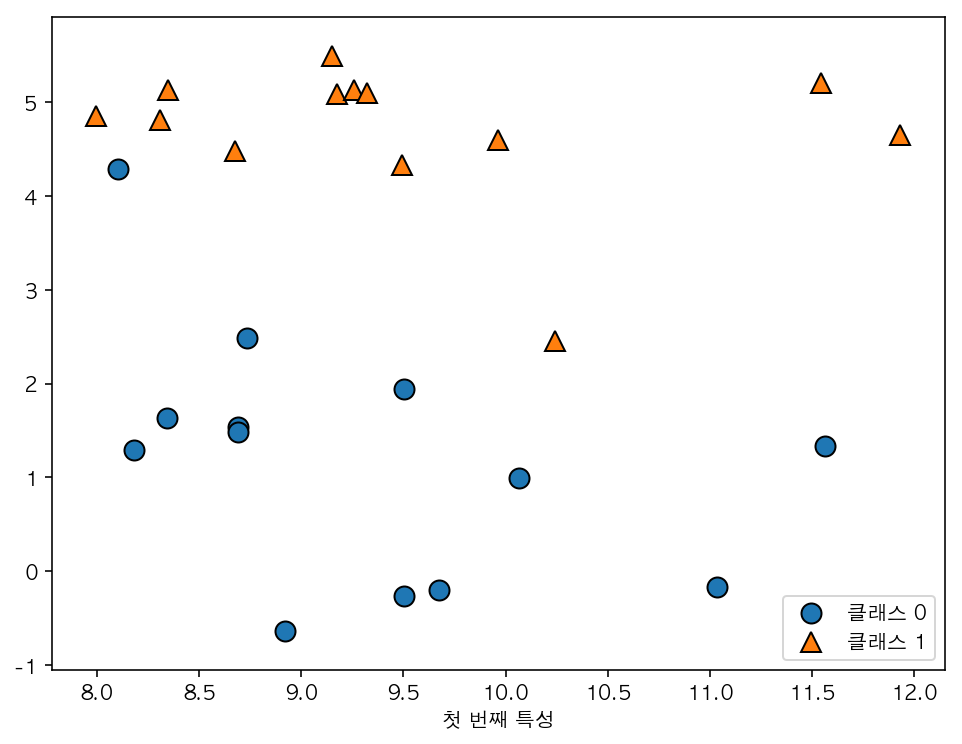

(26, 2)


In [2]:
X, y = mglearn.datasets.make_forge()

plt.figure(figsize=(8, 6))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.show()
print(X.shape)

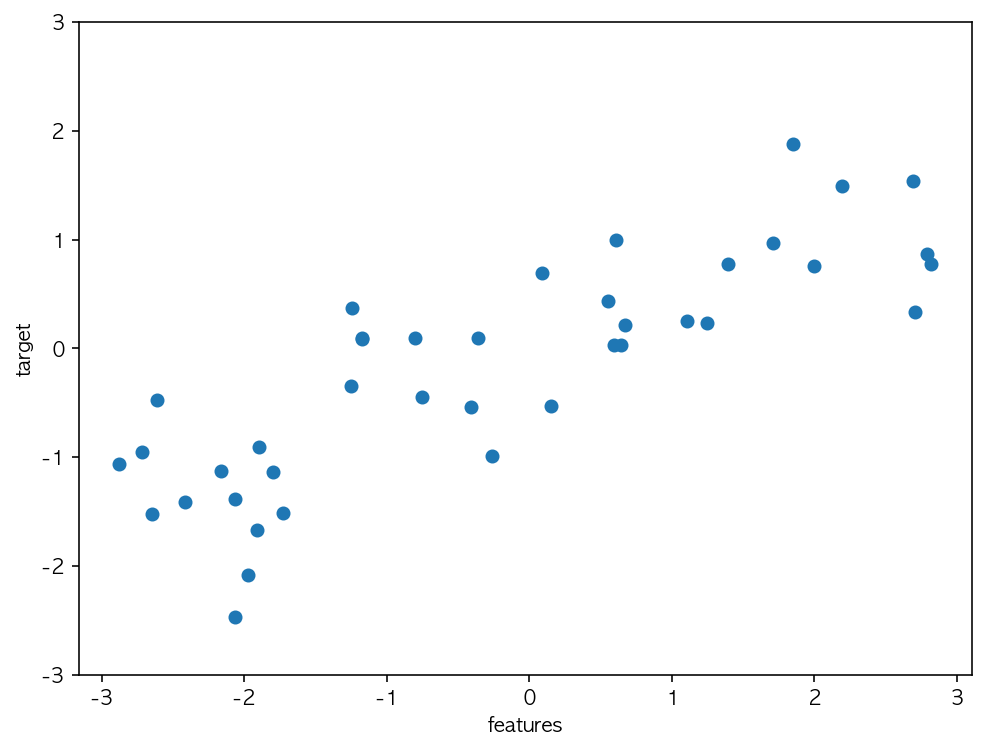

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("features")
plt.ylabel("target")
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
cancer.data.shape

(569, 30)

In [6]:
print(cancer.target_names)
print(np.bincount(cancer.target))

['malignant' 'benign']
[212 357]


In [7]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


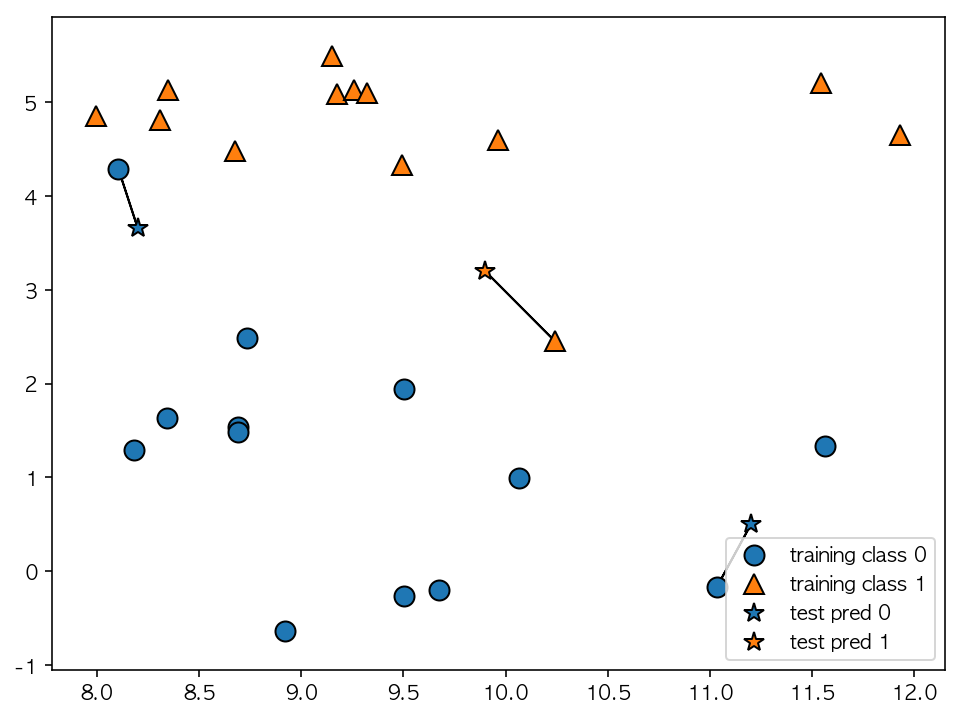

In [10]:
plt.figure(figsize=(8, 6))
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

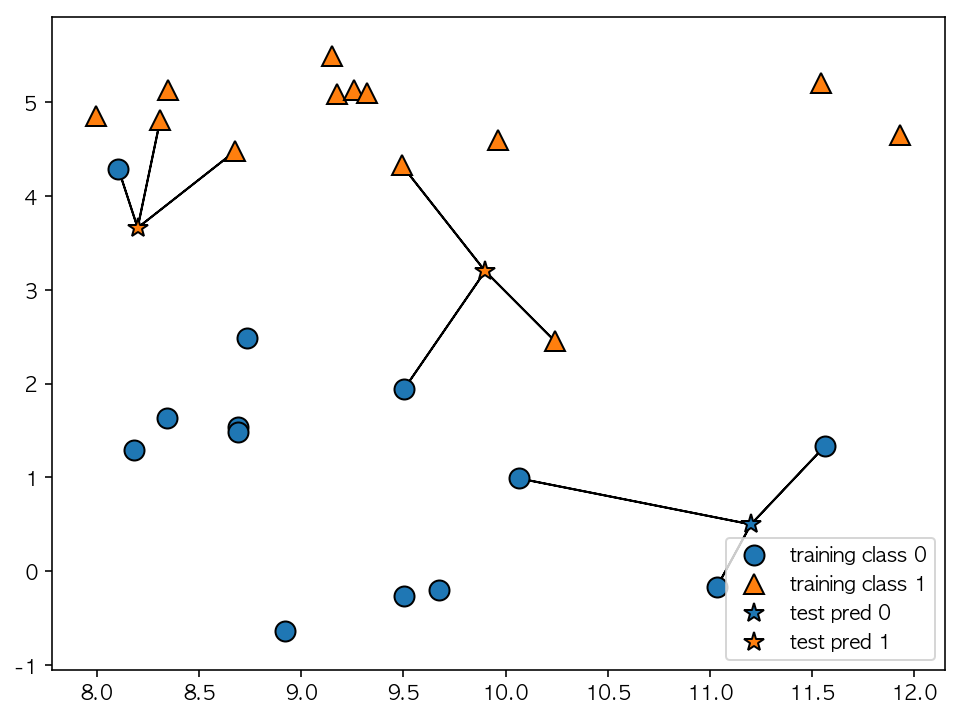

In [11]:
plt.figure(figsize=(8, 6))
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


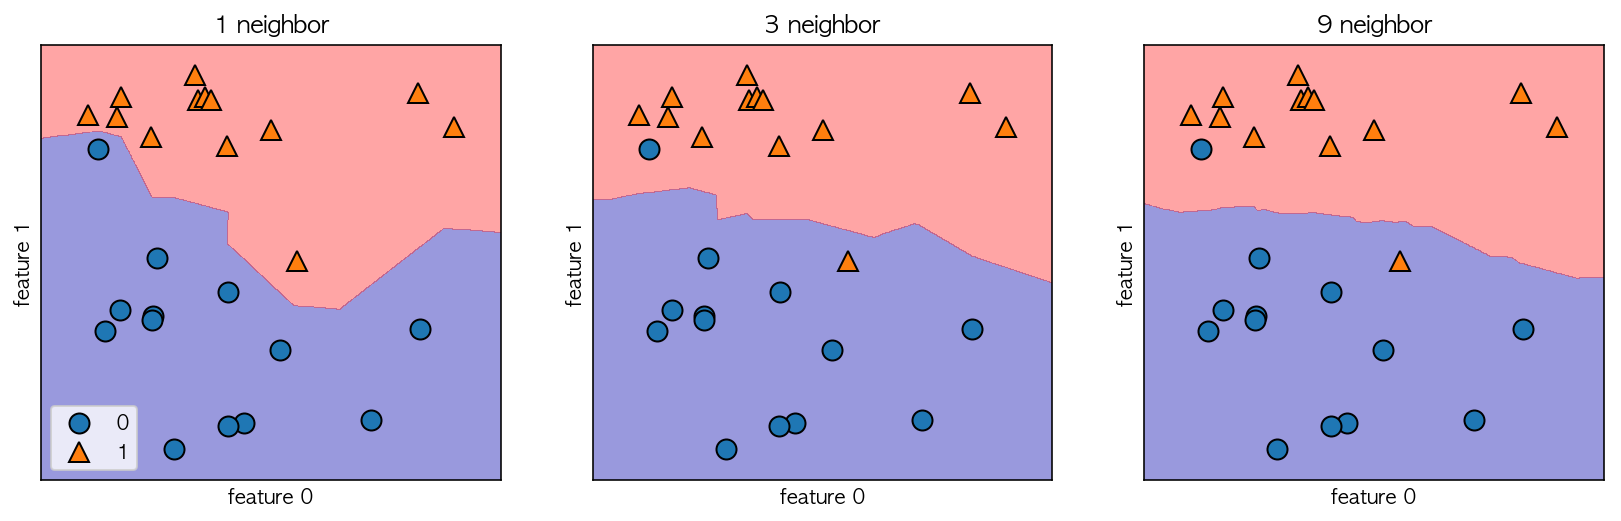

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

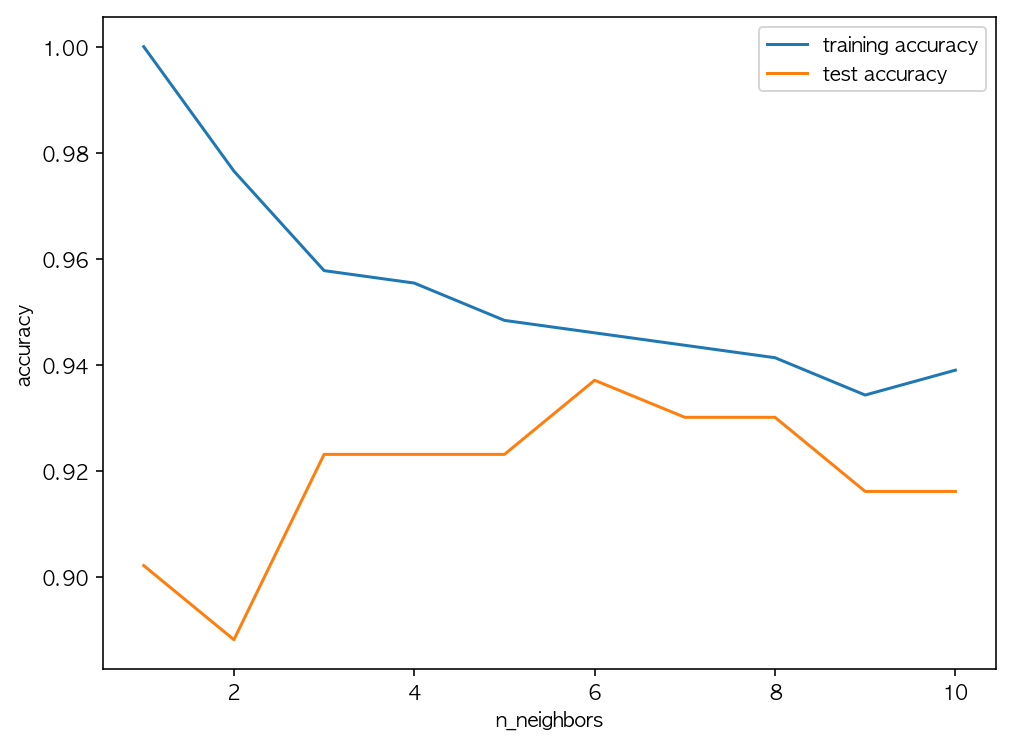

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

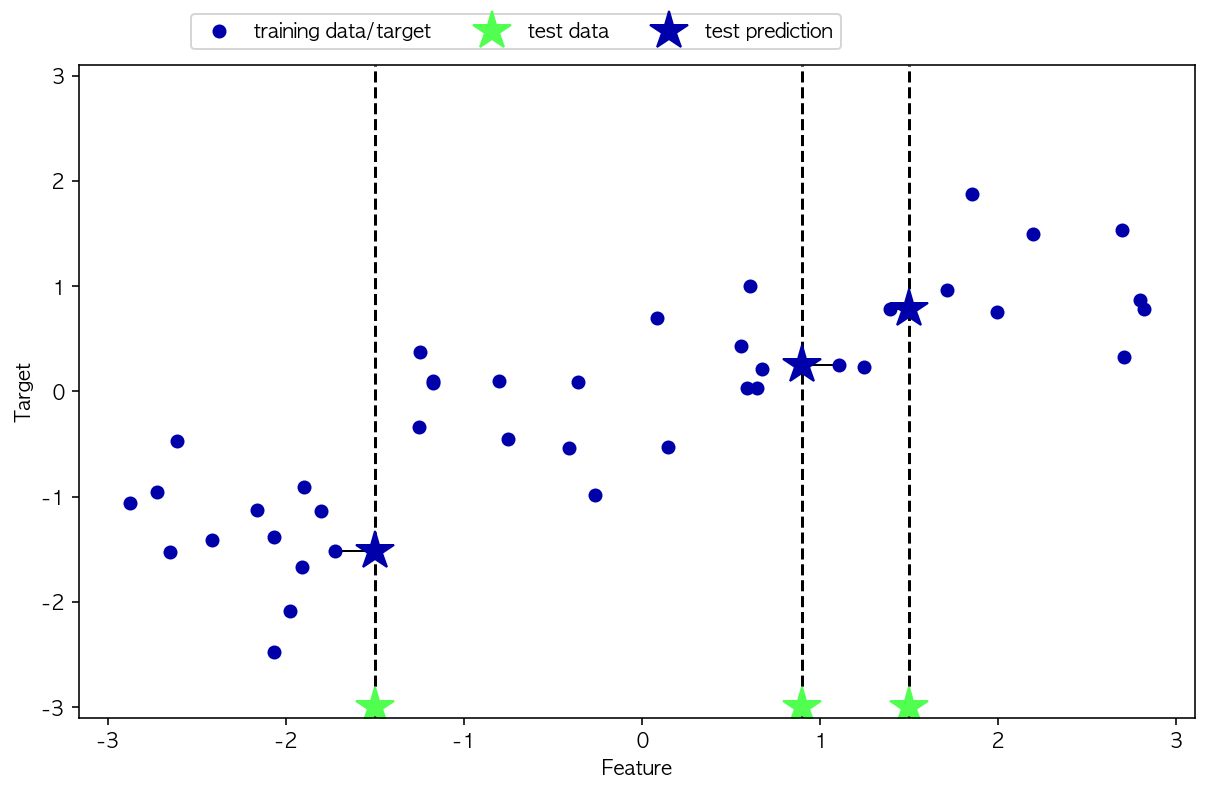

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

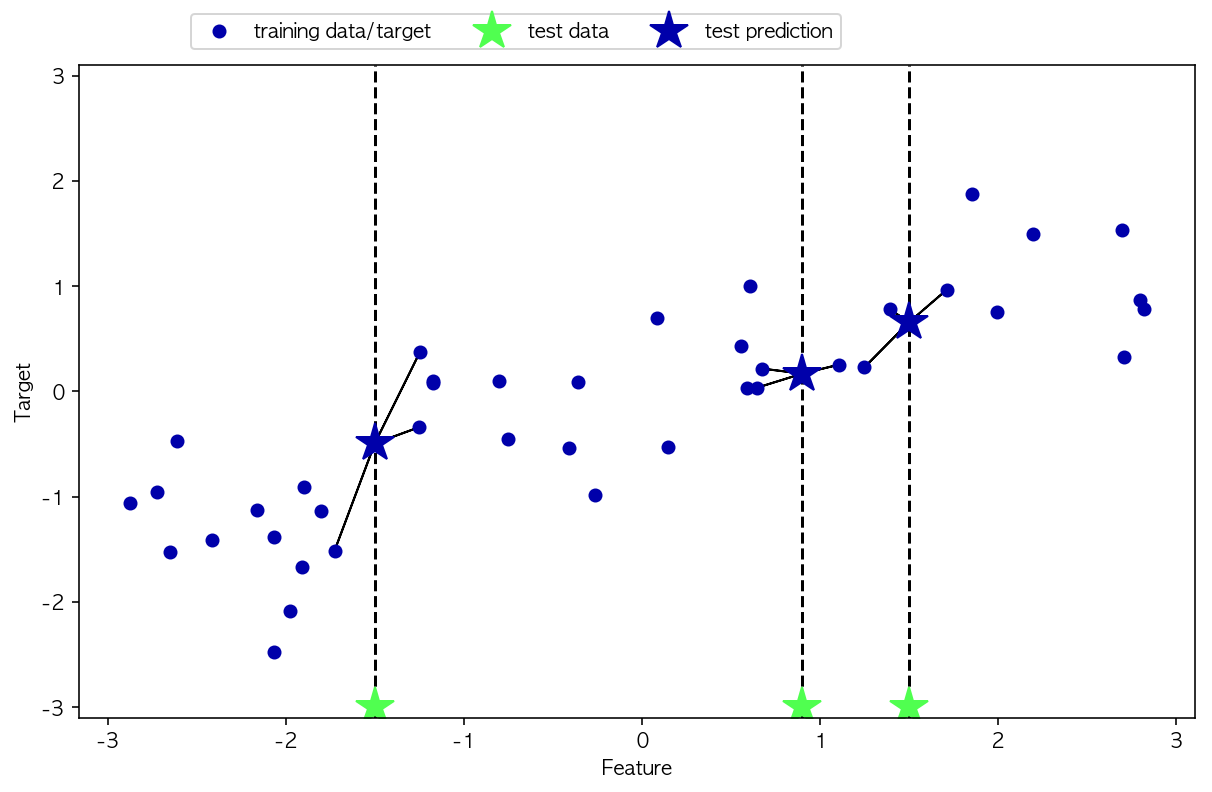

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("prediction of test set:\n{}".format(reg.predict(X_test)))

prediction of test set:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("R-squared of test set: {:.2f}".format(reg.score(X_test, y_test)))

R-squared of test set: 0.83


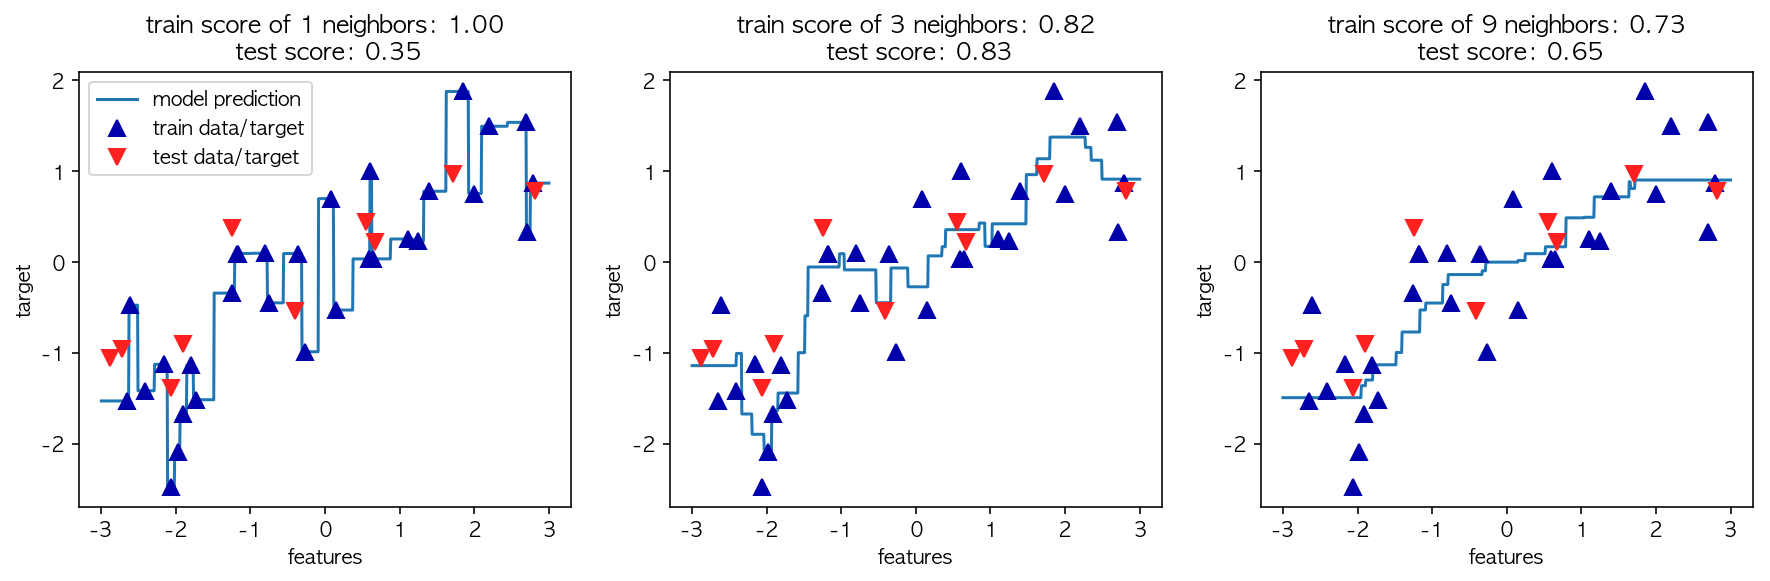

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "train score of {} neighbors: {:.2f}\n test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("features")
    ax.set_ylabel("target")
axes[0].legend(["model prediction", "train data/target", "test data/target"], 
               loc="best")

w[0]: 0.393906  b: -0.031804


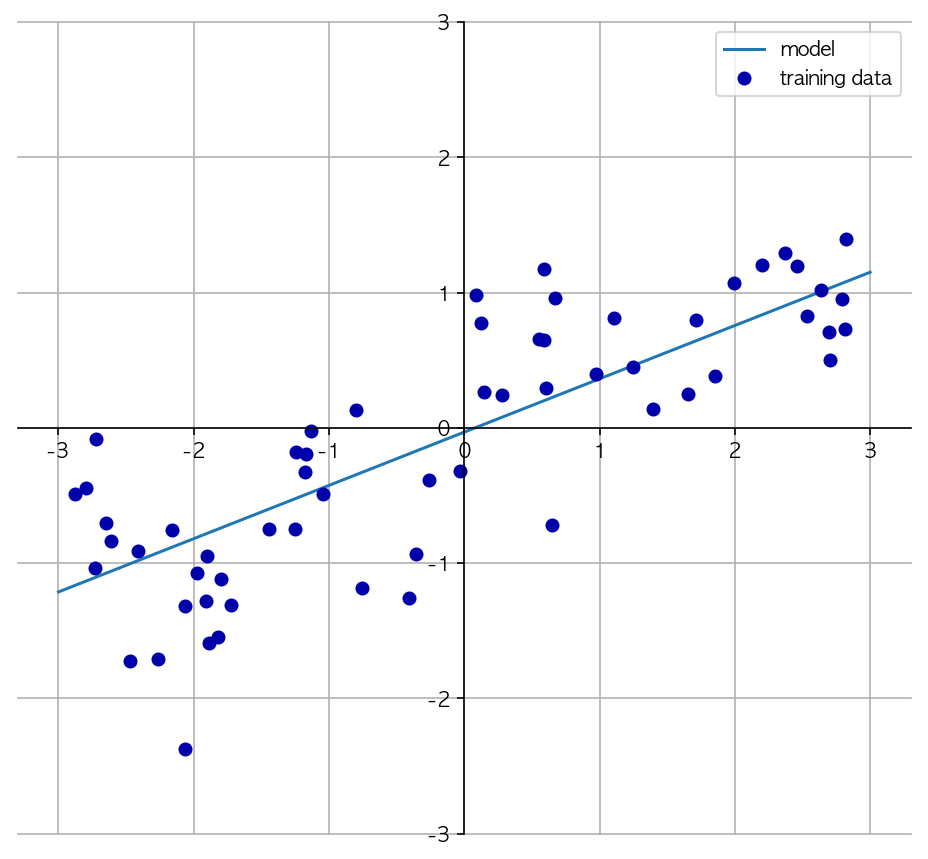

In [25]:
mglearn.plots.plot_linear_regression_wave()

In [26]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("lr.coef: {}".format(lr.coef_))
print("lr.intercept: {}".format(lr.intercept_))

lr.coef: [ 0.39390555]
lr.intercept: -0.031804343026759746


In [28]:
print("Score of train set: {:.2f}".format(lr.score(X_train, y_train)))
print("Score of test set: {:.2f}".format(lr.score(X_test, y_test)))

Score of train set: 0.67
Score of test set: 0.66


In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("Score of train set: {:.2f}".format(lr.score(X_train, y_train)))
print("Score of test set: {:.2f}".format(lr.score(X_test, y_test)))

Score of train set: 0.95
Score of test set: 0.61


In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Score of test set: {:.2f}".format(ridge.score(X_train, y_train)))
print("Score of test set: {:.2f}".format(ridge.score(X_test, y_test)))

Score of test set: 0.89
Score of test set: 0.75


In [32]:
for alpha in [0.01, 0.1, 1, 10]:
    ridge_ = Ridge(alpha=alpha).fit(X_train, y_train)
    print("alpha: {}".format(alpha))
    print("Score of test set: {:.2f}".format(ridge_.score(X_train, y_train)))
    print("Score of test set: {:.2f}".format(ridge_.score(X_test, y_test)))
    print("-"*30)

alpha: 0.01
Score of test set: 0.94
Score of test set: 0.70
------------------------------
alpha: 0.1
Score of test set: 0.93
Score of test set: 0.77
------------------------------
alpha: 1
Score of test set: 0.89
Score of test set: 0.75
------------------------------
alpha: 10
Score of test set: 0.79
Score of test set: 0.64
------------------------------


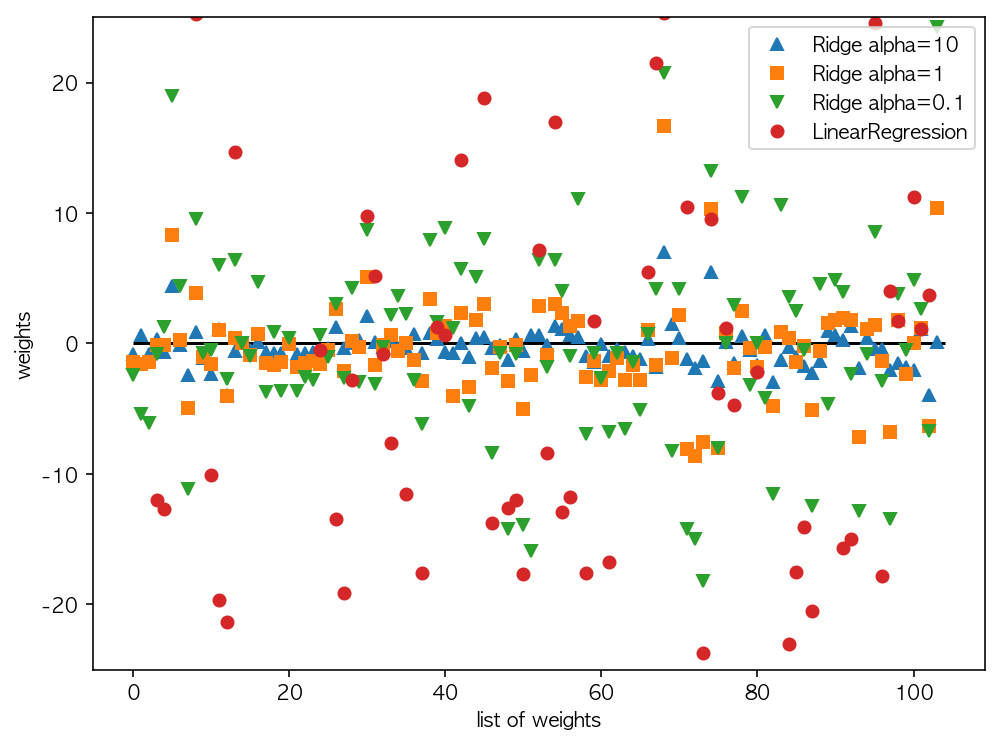

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(Ridge(alpha=10).fit(X_train, y_train).coef_, "^", label="Ridge alpha=10")
plt.plot(Ridge(alpha=1).fit(X_train, y_train).coef_, "s", label="Ridge alpha=1")
plt.plot(Ridge(alpha=0.1).fit(X_train, y_train).coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("list of weights")
plt.ylabel("weights")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

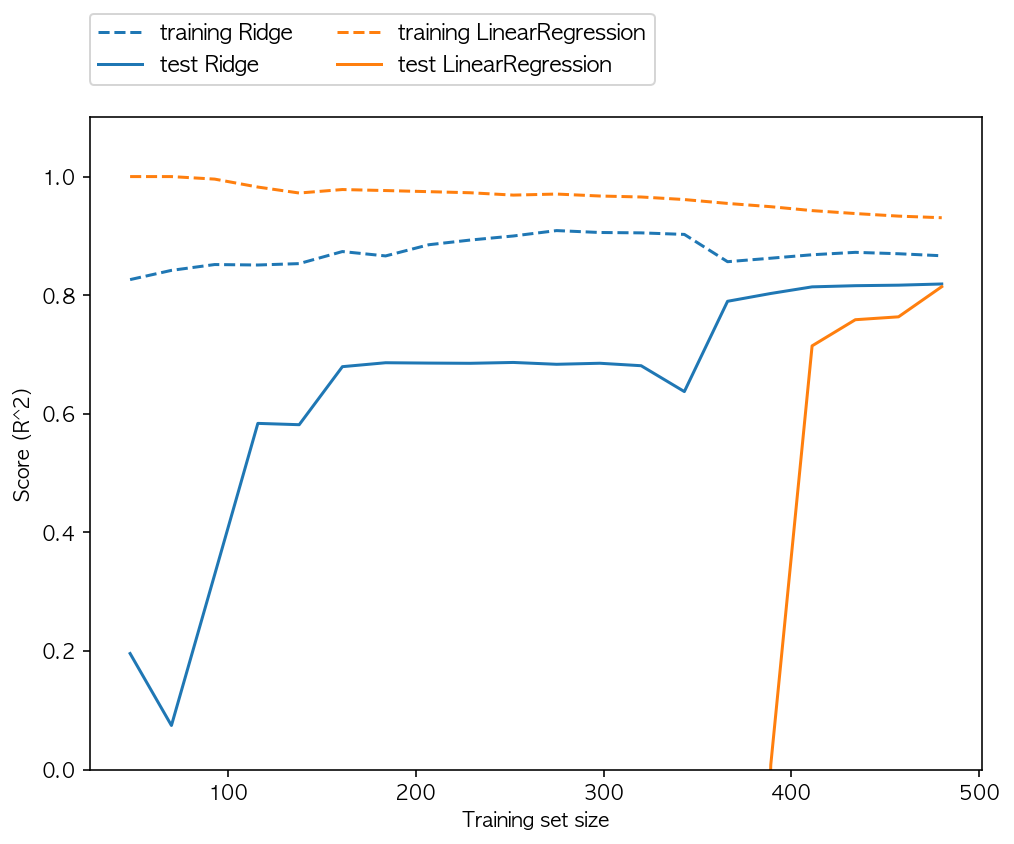

In [34]:
plt.figure(figsize=(8, 6))
mglearn.plots.plot_ridge_n_samples()

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Score of train set: {:.2f}".format(lasso.score(X_train, y_train)))
print("Score of test set: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Score of train set: 0.29
Score of test set: 0.21
Number of features used: 4


In [36]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Score of train set: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Score of test set: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Score of train set: 0.90
Score of test set: 0.77
Number of features used: 33


In [37]:
for alpha in [0.0001, 0.01, 1]:
    lasso_ = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    print("alpha: {}".format(alpha))
    print("Score of test set: {:.2f}".format(lasso_.score(X_train, y_train)))
    print("Score of test set: {:.2f}".format(lasso_.score(X_test, y_test)))
    print("Number of features used: {}".format(np.sum(lasso_.coef_ != 0)))
    print("-"*30)

alpha: 0.0001
Score of test set: 0.95
Score of test set: 0.64
Number of features used: 94
------------------------------
alpha: 0.01
Score of test set: 0.90
Score of test set: 0.77
Number of features used: 33
------------------------------
alpha: 1
Score of test set: 0.29
Score of test set: 0.21
Number of features used: 4
------------------------------


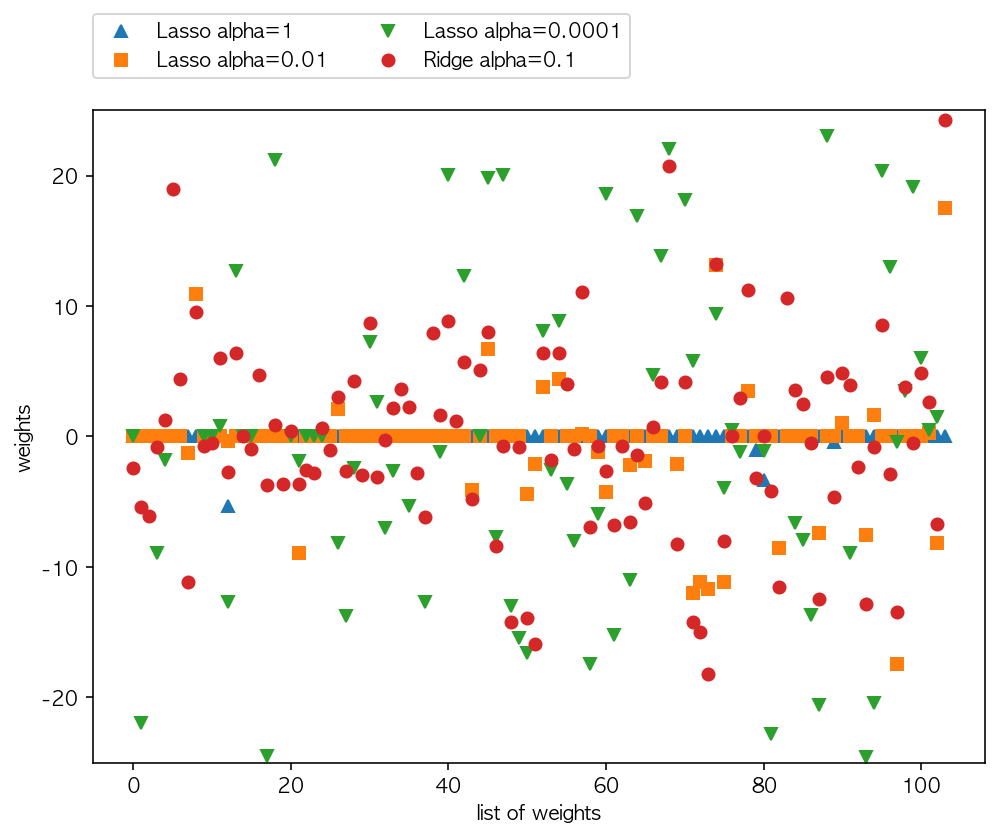

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(Lasso(alpha=1, max_iter=100000).fit(X_train, y_train).coef_, "^", label="Lasso alpha=1")
plt.plot(Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train).coef_, "s", label="Lasso alpha=0.01")
plt.plot(Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train).coef_, "v", label="Lasso alpha=0.0001")

plt.plot(Ridge(alpha=0.1).fit(X_train, y_train).coef_, "o", label="Ridge alpha=0.1")
plt.xlabel("list of weights")
plt.ylabel("weights")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))
plt.show()

## 분류용 선형 모델

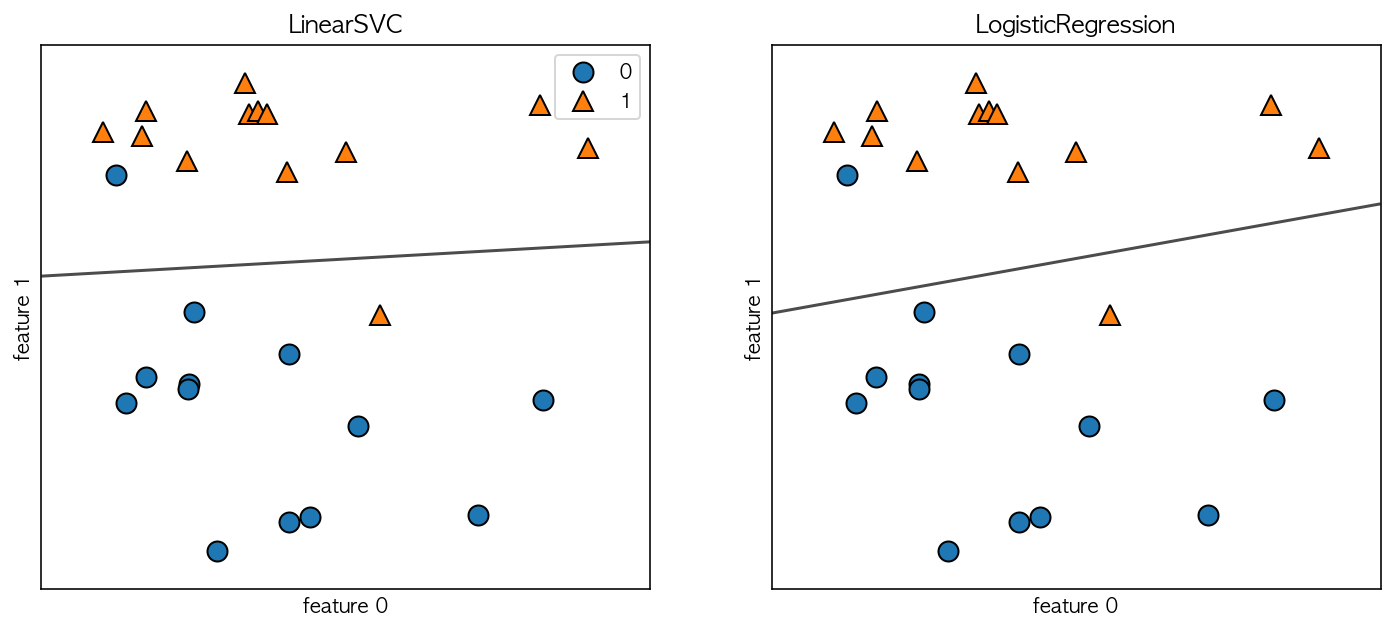

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()
plt.show()

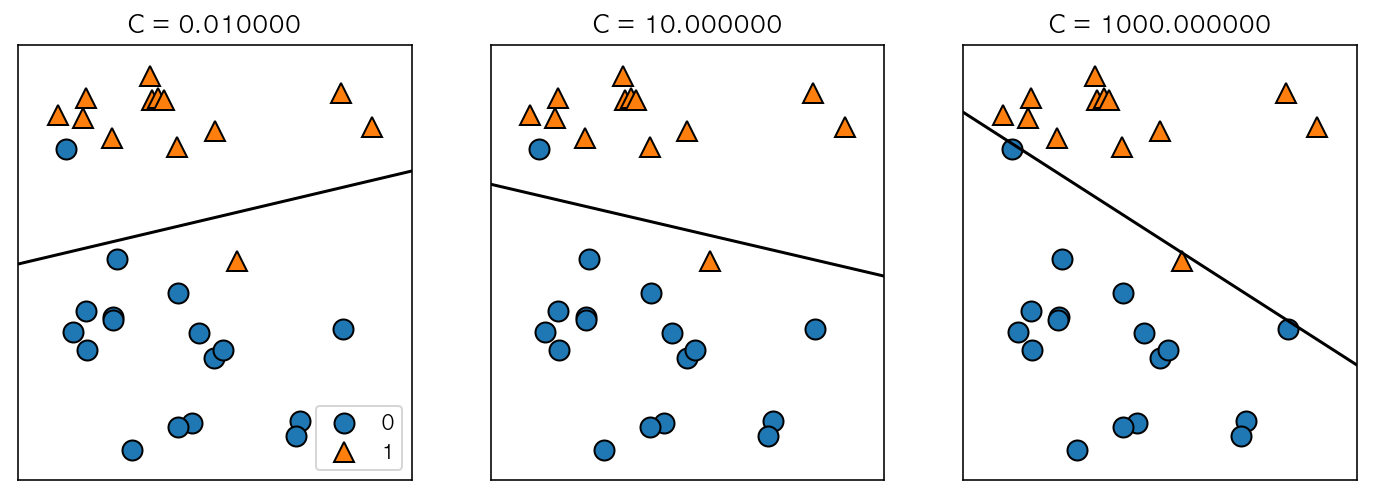

In [40]:
mglearn.plots.plot_linear_svc_regularization()

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Score of train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(logreg.score(X_test, y_test)))

Score of train set: 0.955
Score of test set: 0.958


In [42]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Score of train set: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(logreg100.score(X_test, y_test)))

Score of train set: 0.972
Score of test set: 0.965


In [43]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Score of train set: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(logreg001.score(X_test, y_test)))

Score of train set: 0.934
Score of test set: 0.930


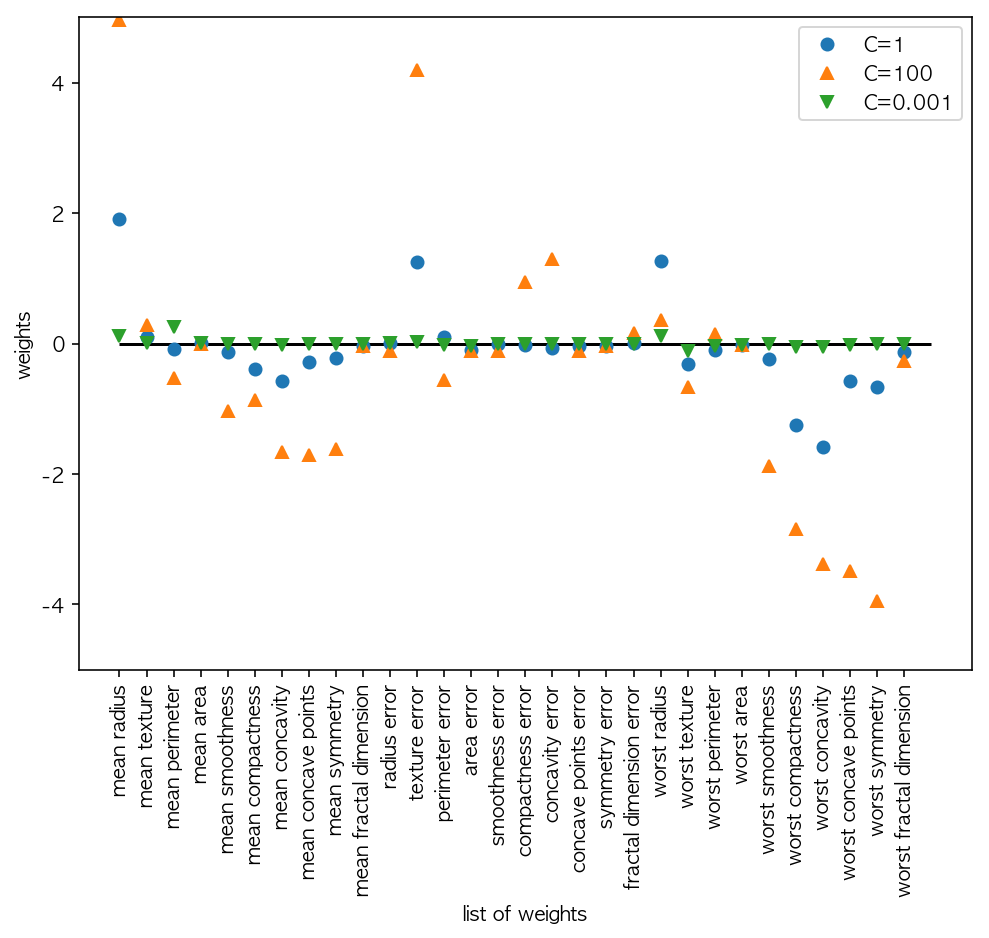

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(logreg.coef_.T, "o", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg001.coef_.T, "v", label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])

plt.ylim(-5, 5)
plt.xlabel("list of weights")
plt.ylabel("weights")
plt.legend()
plt.show()

train accuracy of logistic regression: 0.91 when C=0.001
test accuracy of logistic regression: 0.92 when C=0.001
train accuracy of logistic regression: 0.96 when C=1.000
test accuracy of logistic regression: 0.96 when C=1.000
train accuracy of logistic regression: 0.99 when C=100.000
test accuracy of logistic regression: 0.98 when C=100.000


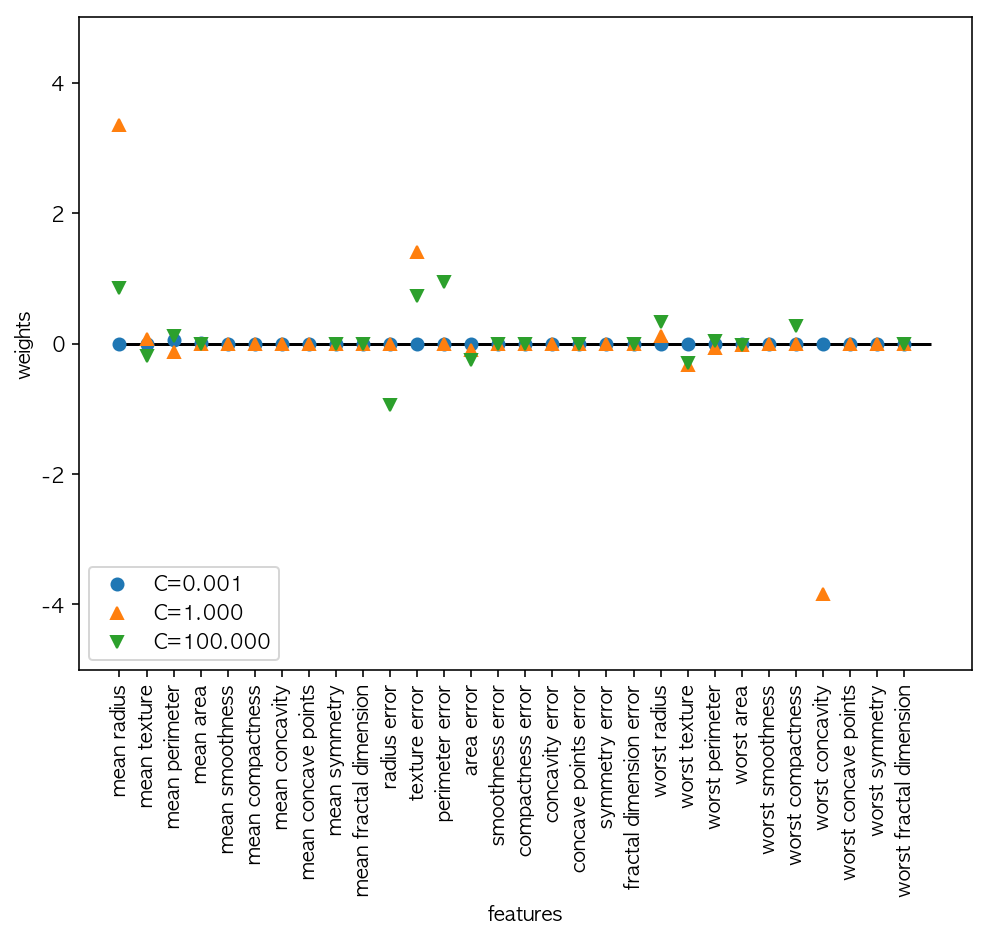

In [45]:
plt.figure(figsize=(8, 6))
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("train accuracy of logistic regression: {:.2f} when C={:.3f}".format(
        lr_l1.score(X_train, y_train), C))
    print("test accuracy of logistic regression: {:.2f} when C={:.3f}".format(
        lr_l1.score(X_test, y_test), C))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("features")
plt.ylabel("weights")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

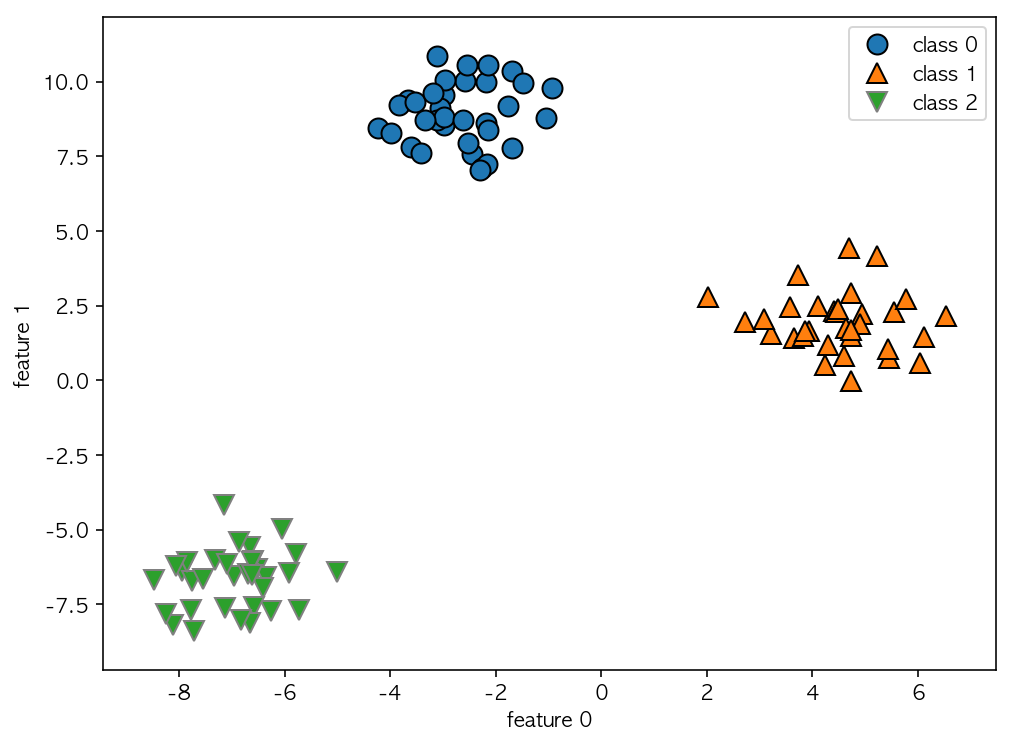

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.figure(figsize=(8,6))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])
plt.show()

In [47]:
linear_svm = LinearSVC().fit(X, y)
print("Shape of array of coefficient: ", linear_svm.coef_.shape)
print("Shape of array of intercept: ", linear_svm.intercept_.shape)

Shape of array of coefficient:  (3, 2)
Shape of array of intercept:  (3,)


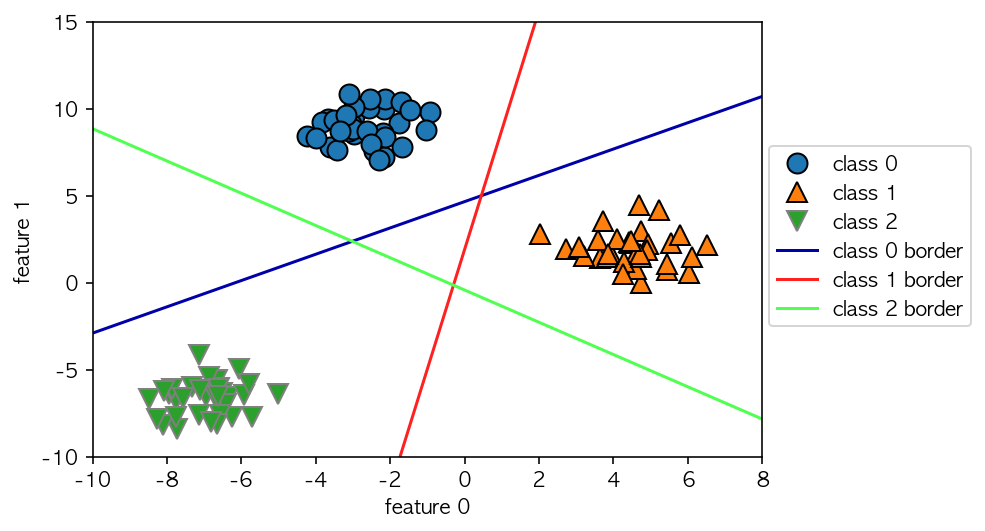

In [48]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2", 
            "class 0 border", "class 1 border", "class 2 border"], loc=(1.01, 0.3))
plt.show()

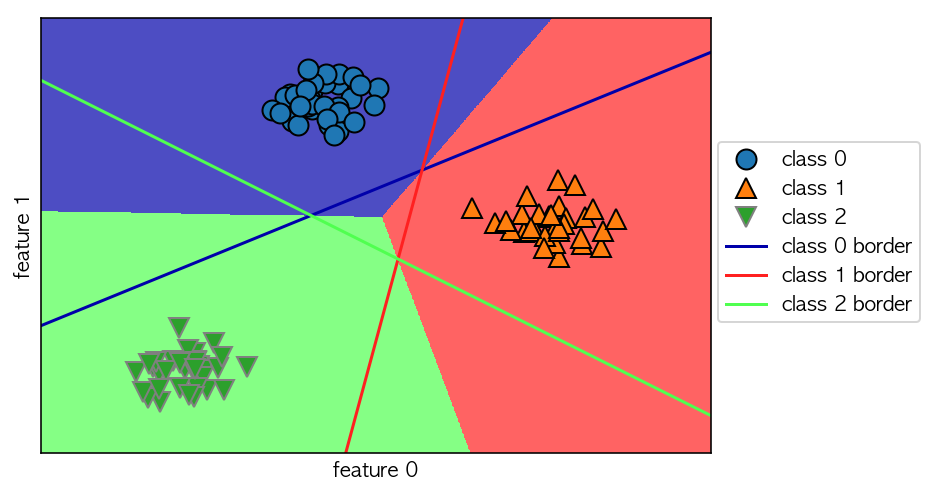

In [49]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2", 
            "class 0 border", "class 1 border", "class 2 border"], loc=(1.01, 0.3))
plt.show()

In [50]:
X = np.array([[0, 1, 0, 1], 
              [1, 0, 1, 1], 
              [0, 0, 0, 1], 
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [51]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print("feature count:\n{}".format(counts))

feature count:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [52]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Score of train set: {:.3f}".format(tree.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(tree.score(X_test, y_test)))

Score of train set: 1.000
Score of test set: 0.937


In [53]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Score of train set: {:.3f}".format(tree.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(tree.score(X_test, y_test)))

Score of train set: 0.988
Score of test set: 0.951


In [54]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [55]:
print("feautre importance:\n{}".format(tree.feature_importances_))

feautre importance:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


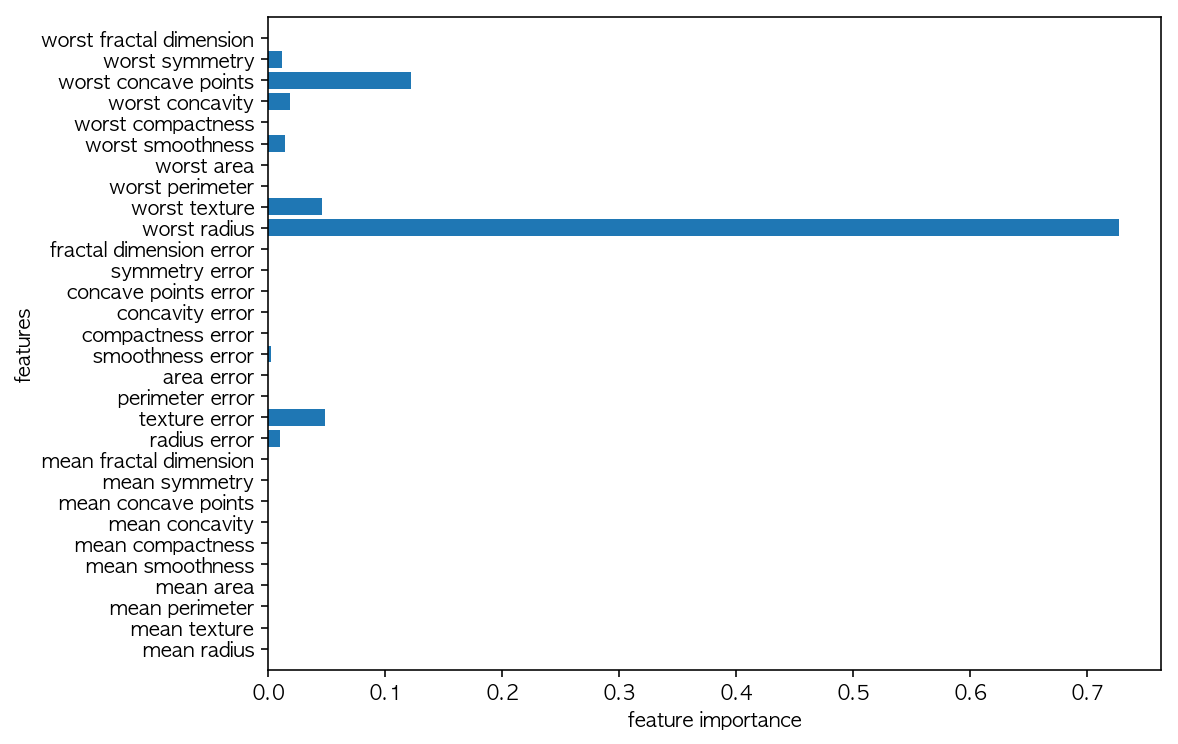

In [56]:
def plot_feature_importance_cancer(model):
    plt.figure(figsize=(8,6))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_feature_importance_cancer(tree)

Feature importances: [ 0.  1.]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

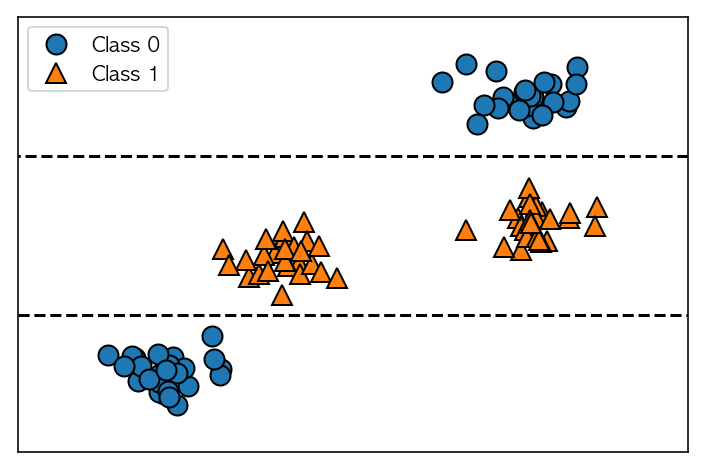

In [57]:
mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0,0.5,'price ($/Mbyte)')

/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


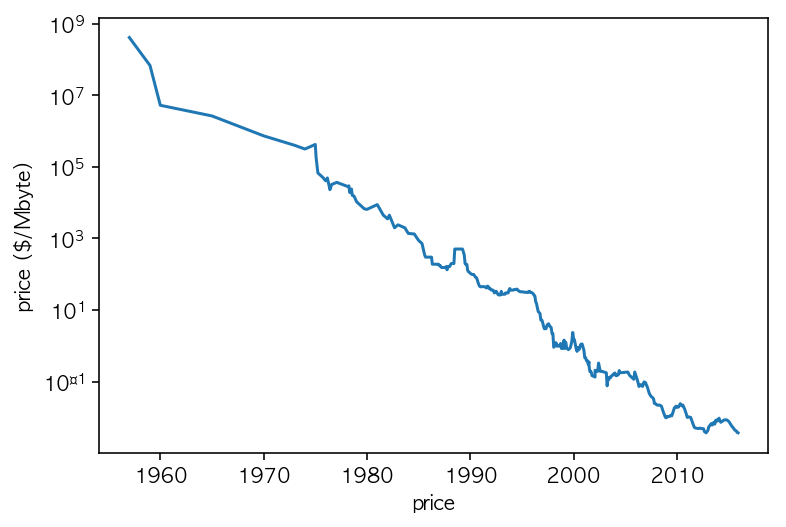

In [58]:
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("price")
plt.ylabel("price ($/Mbyte)")

In [59]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


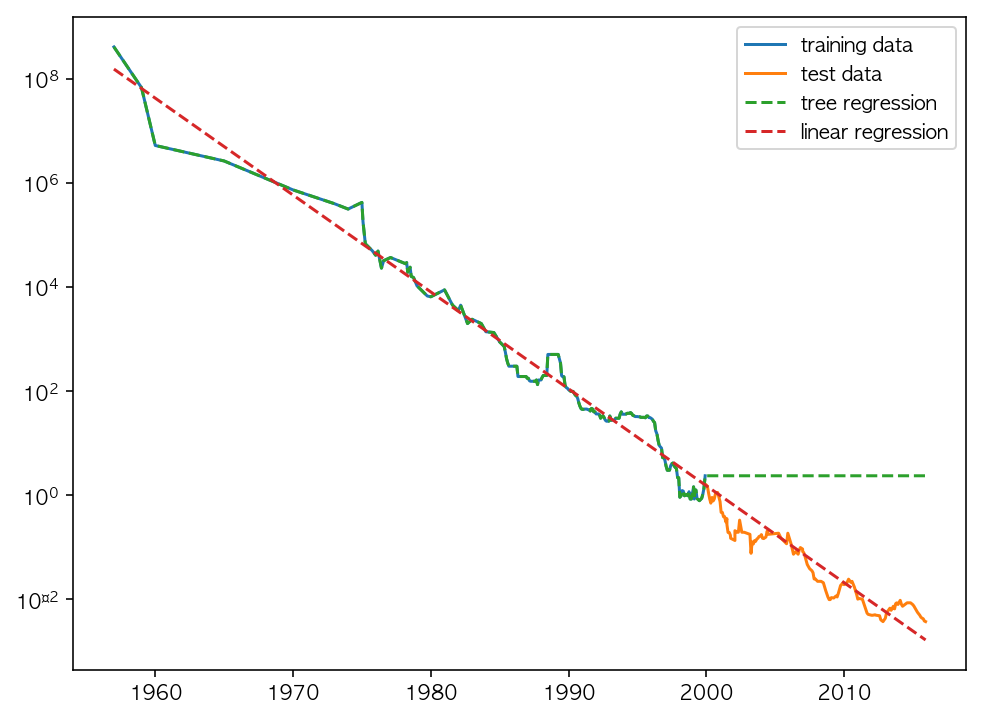

In [60]:
plt.figure(figsize=(8,6))
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree regression", linestyle="--")
plt.semilogy(ram_prices.date, price_lr, label="linear regression", linestyle="--")
plt.legend()
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

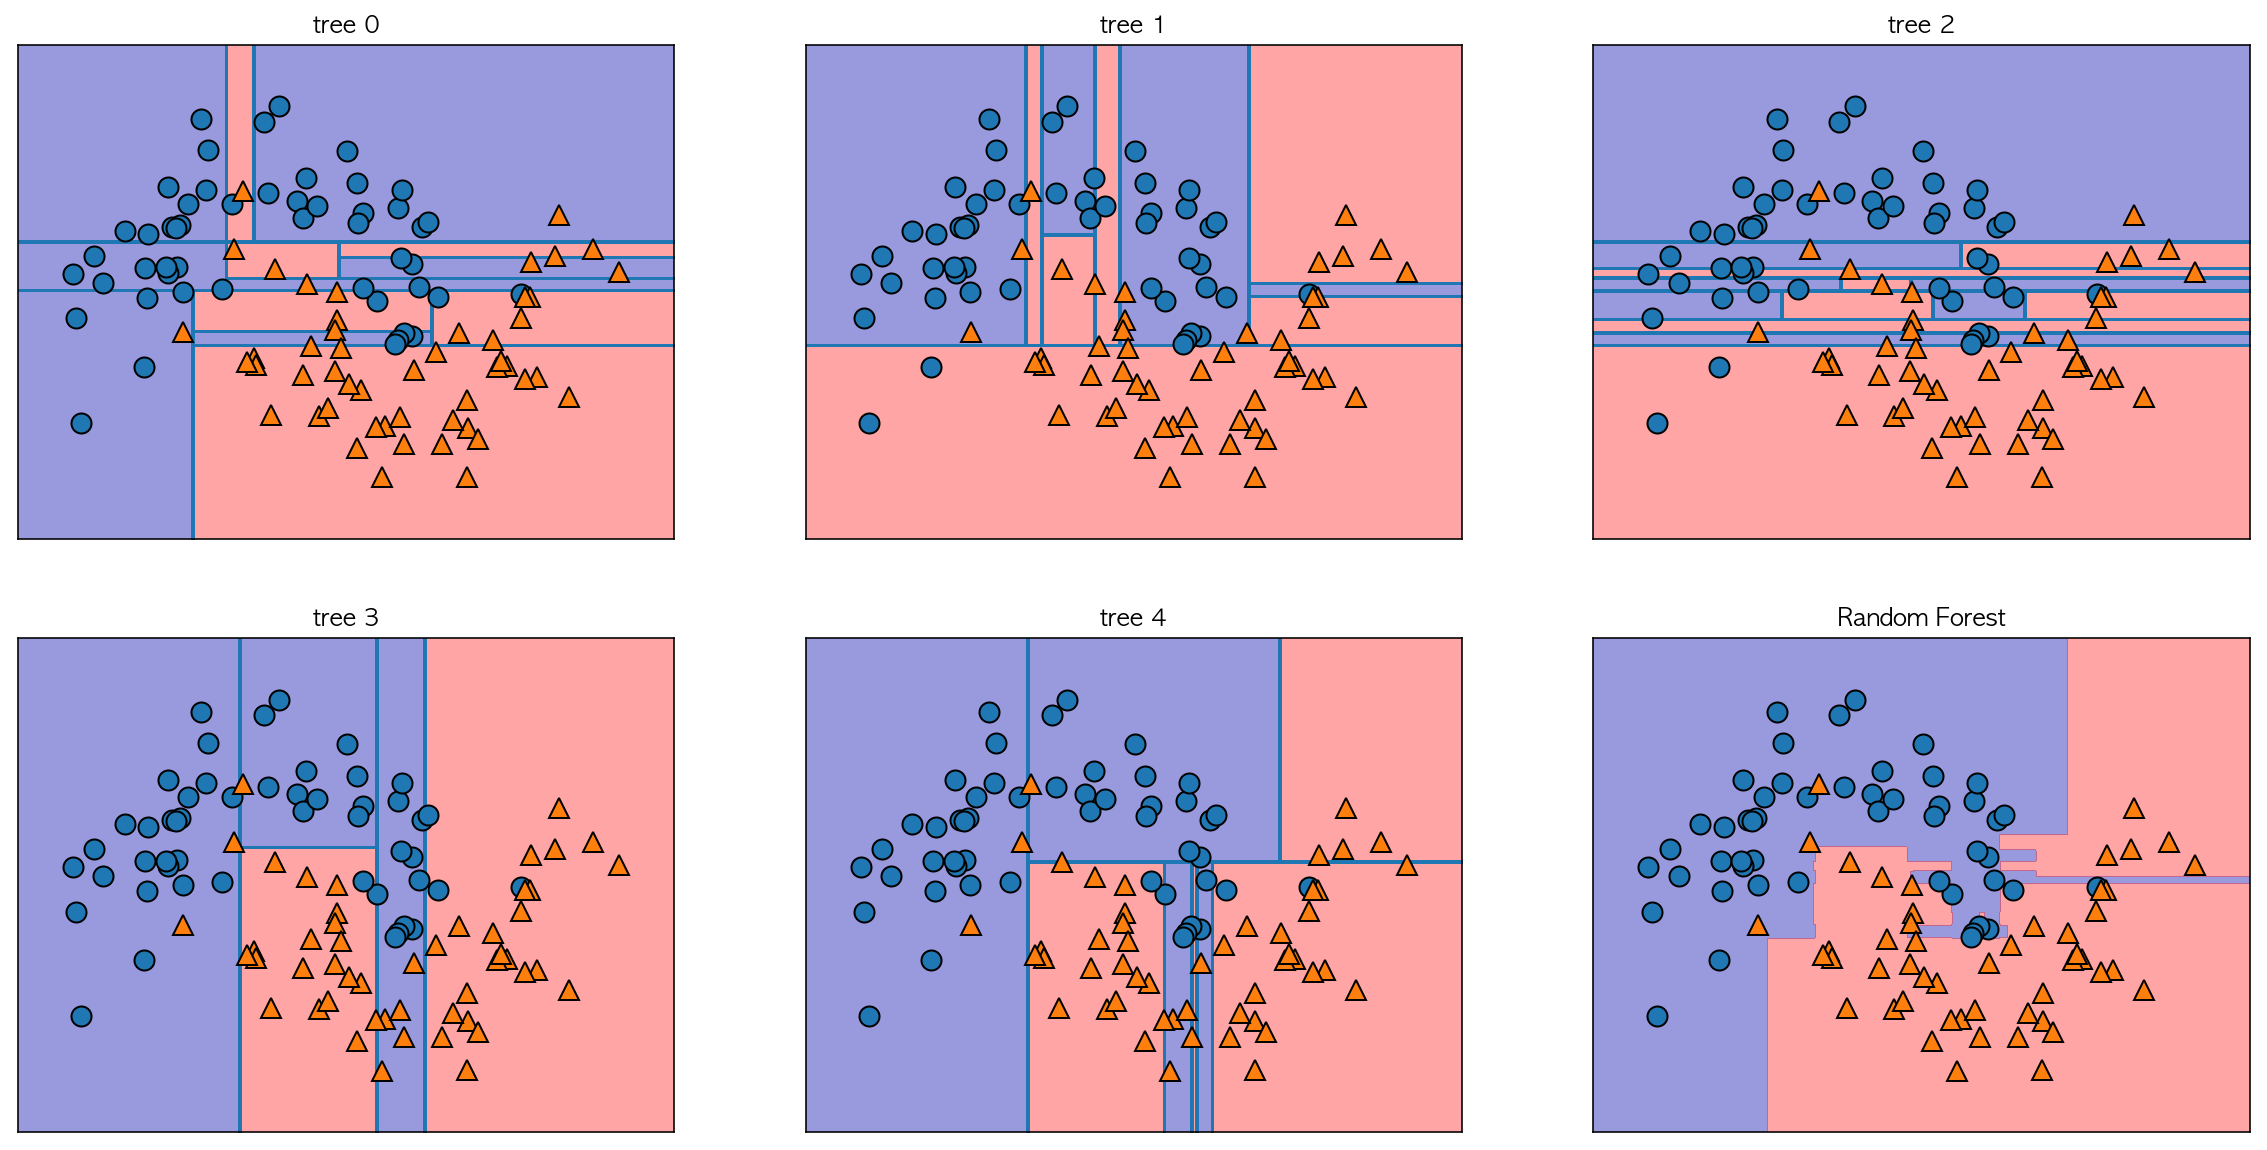

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Score of train set: {:.3f}".format(forest.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(forest.score(X_test, y_test)))

Score of train set: 1.000
Score of test set: 0.972


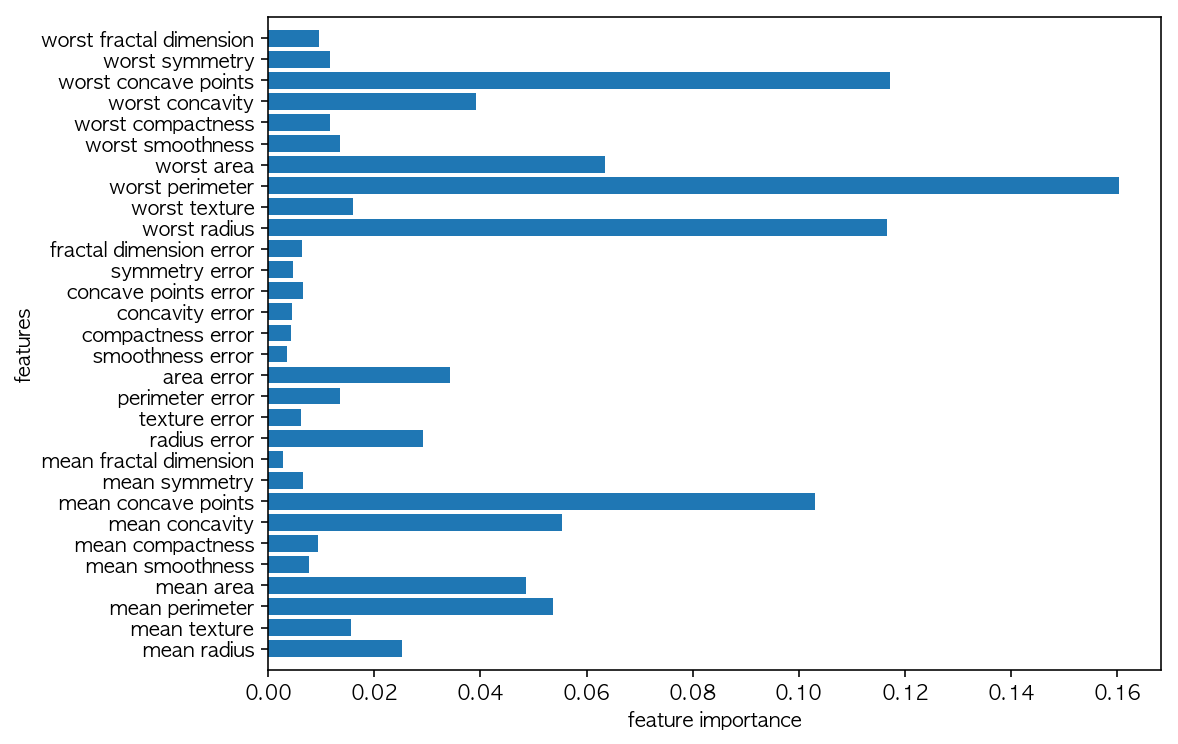

In [64]:
plot_feature_importance_cancer(forest)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Score of train set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Score of train set: 1.000
Score of test set: 0.958


In [66]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Score of train set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Score of train set: 0.991
Score of test set: 0.972


In [67]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Score of train set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Score of train set: 0.988
Score of test set: 0.965


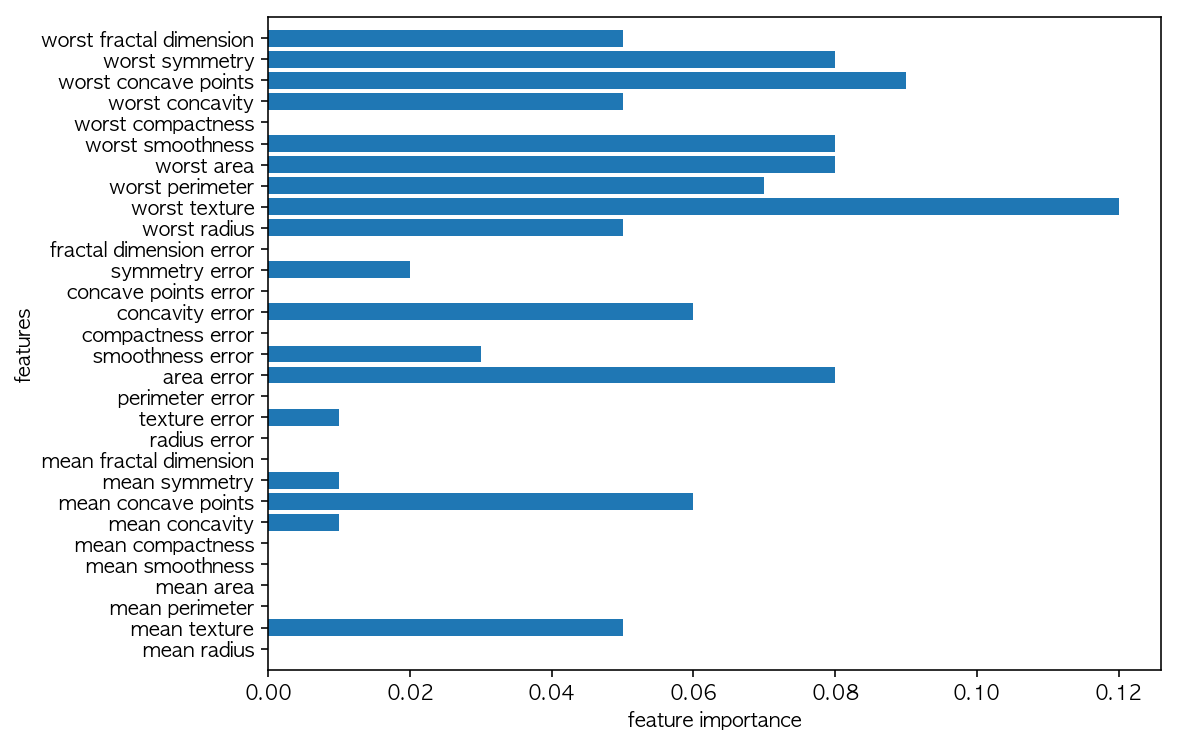

In [68]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importance_cancer(gbrt)

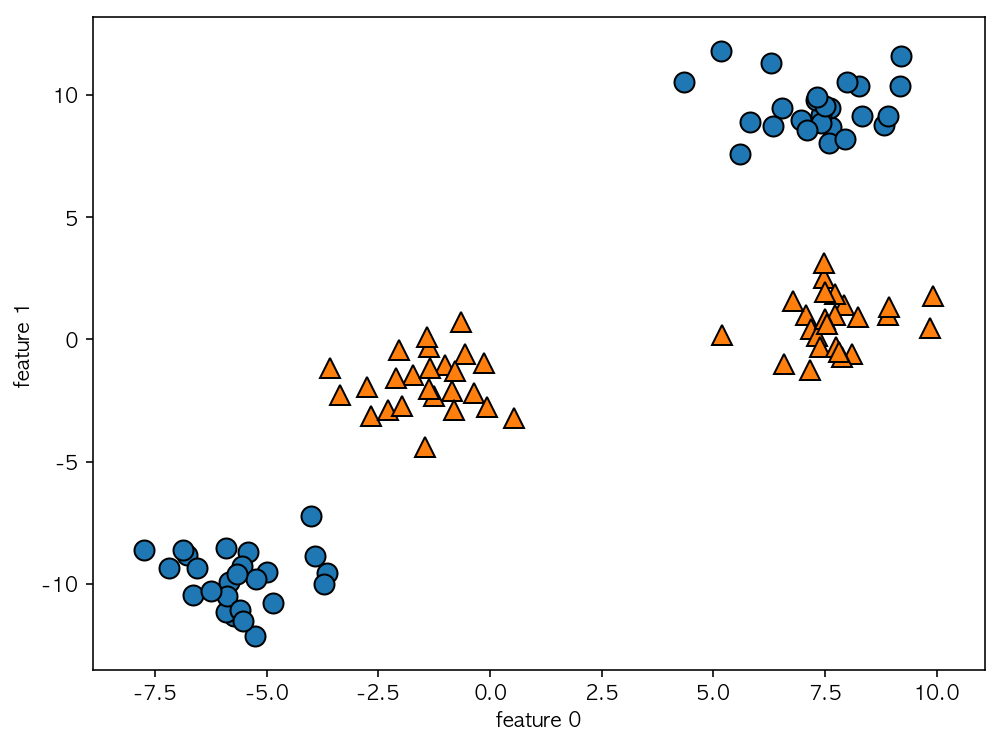

In [69]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.figure(figsize=(8, 6))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

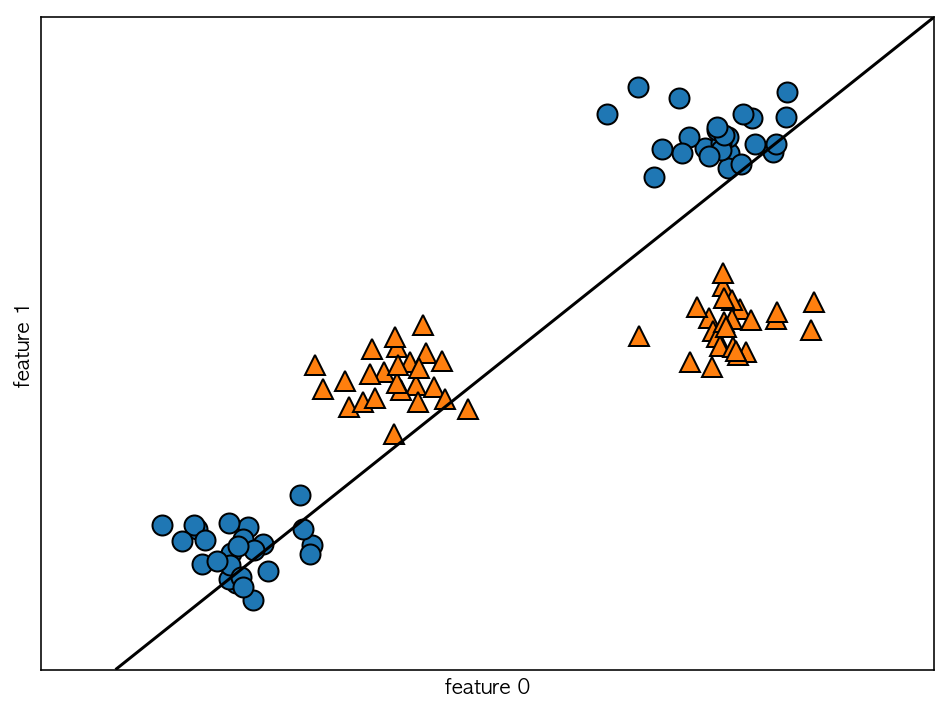

In [70]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

plt.figure(figsize=(8, 6))
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

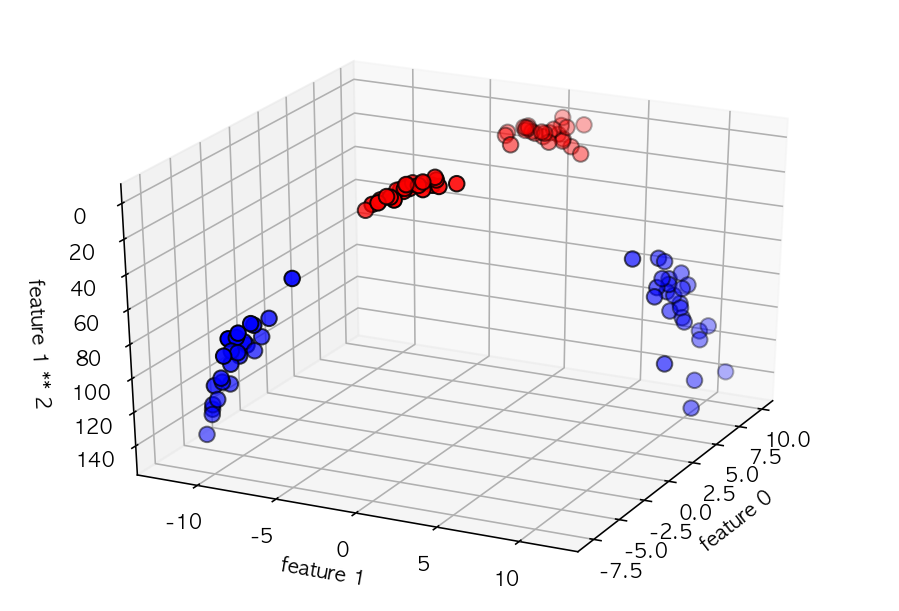

In [71]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")
plt.show()

In [72]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

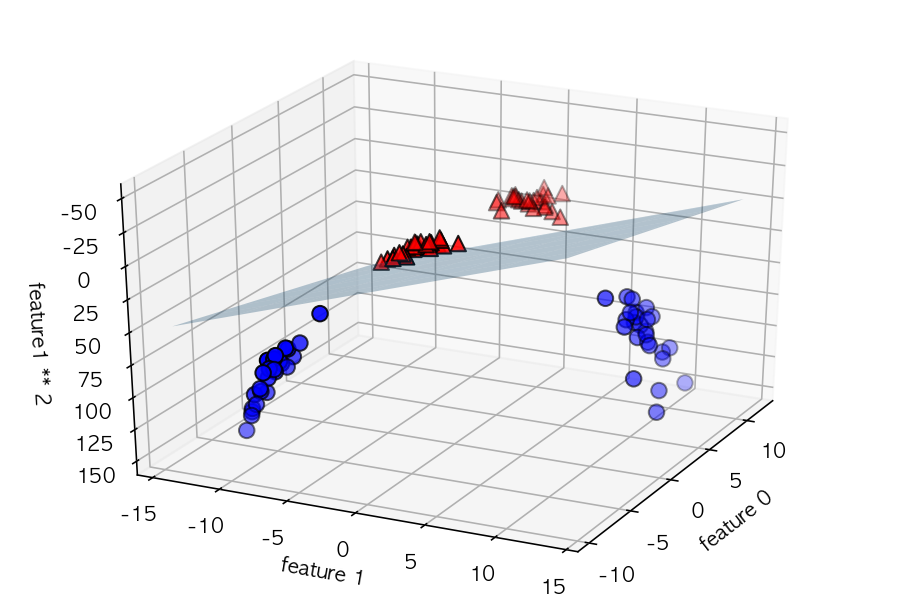

In [73]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:, 1].max()+2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/ -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")
plt.show()

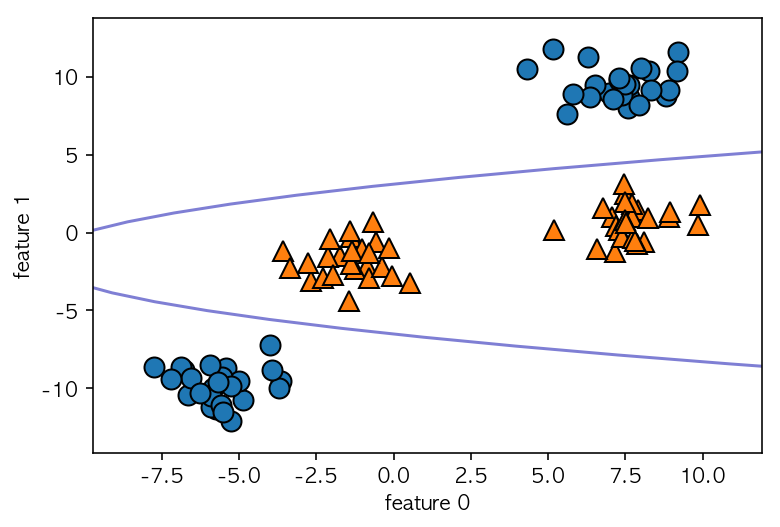

In [74]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

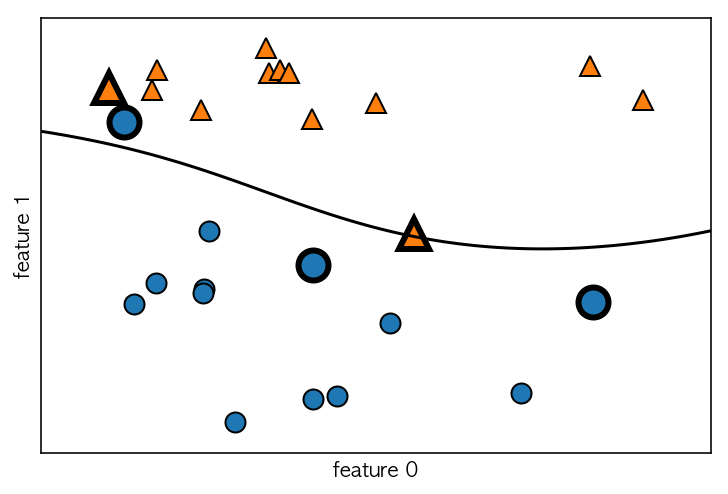

In [75]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

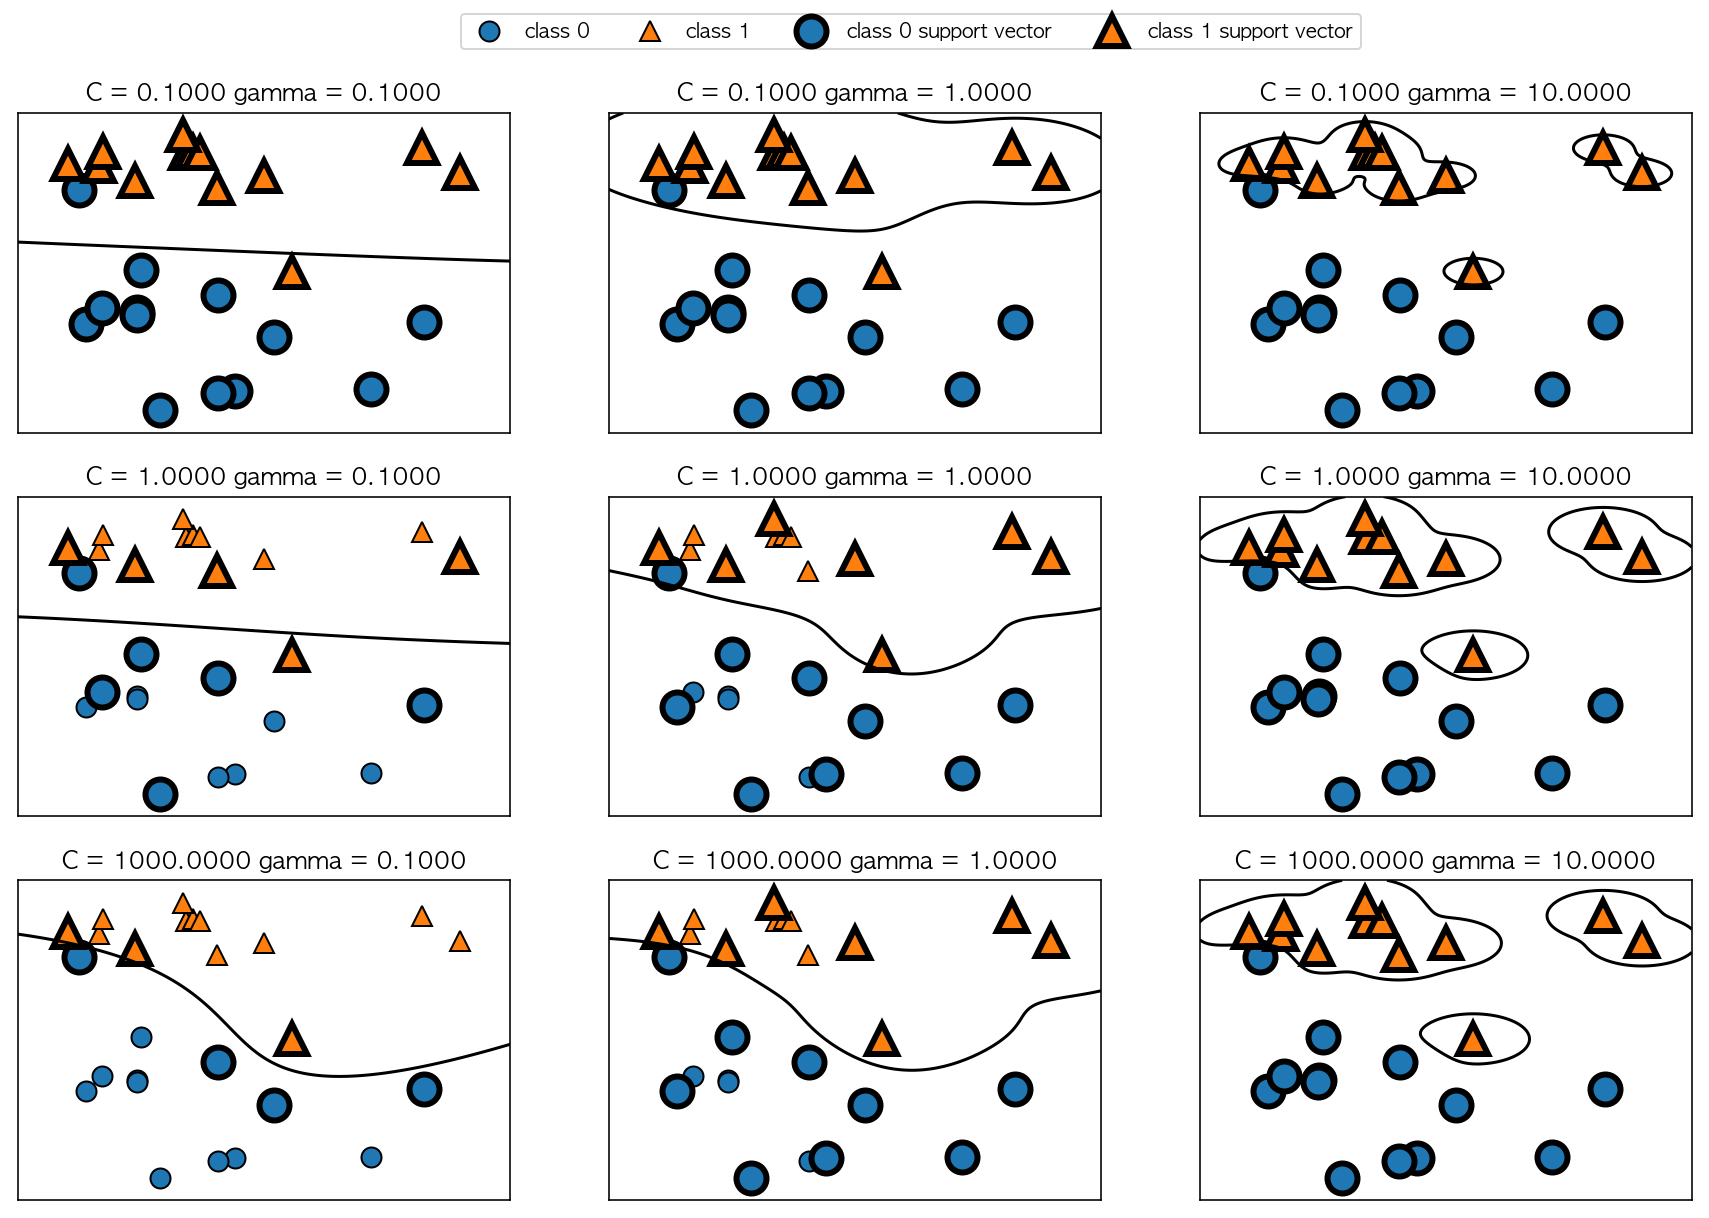

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", 
                   "class 1 support vector"], ncol=4, loc=(.9, 1.2))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    
svc = SVC()
svc.fit(X_train, y_train)

print("Score of train set: {:.3f}".format(svc.score(X_train, y_train)))
print("Score of test set: {:.3f}".format(svc.score(X_test, y_test)))

Score of train set: 1.000
Score of test set: 0.629


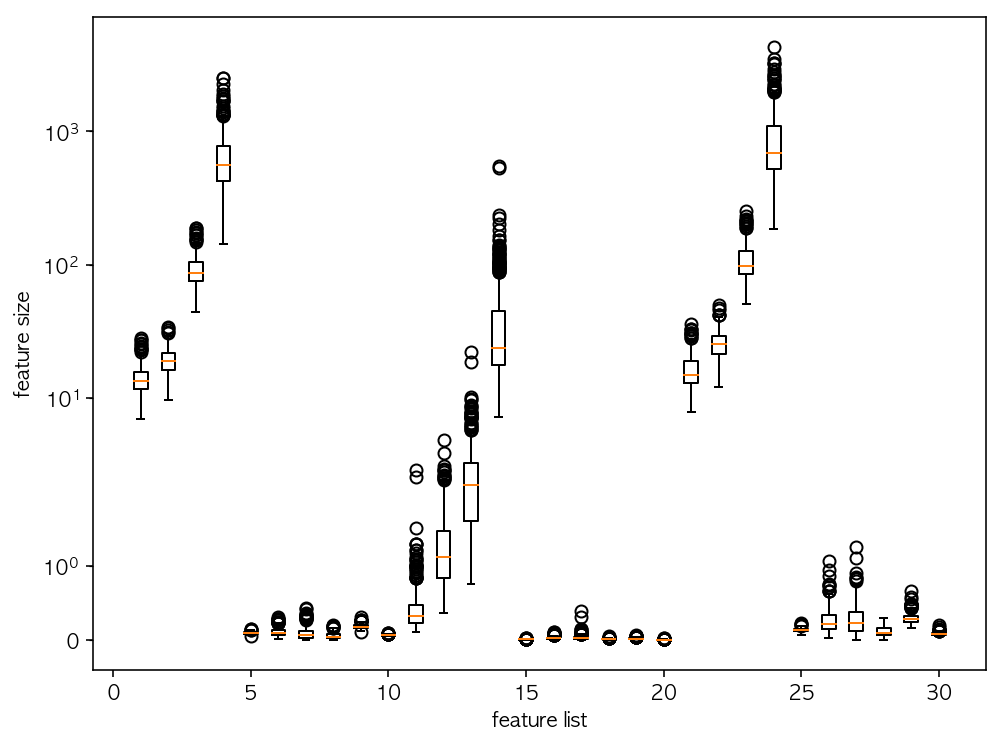

In [78]:
plt.figure(figsize=(8, 6))
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feature size")
plt.show()

In [79]:
min_on_training = X_train.min(axis=0)

range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최댓값\n{}".format(X_train_scaled.max(axis=0)))

특성별 최솟값
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
특성별 최댓값
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [80]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [81]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Score of train set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Score of test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Score of train set: 0.948
Score of test set: 0.951


In [82]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Score of train set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Score of test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Score of train set: 0.988
Score of test set: 0.972


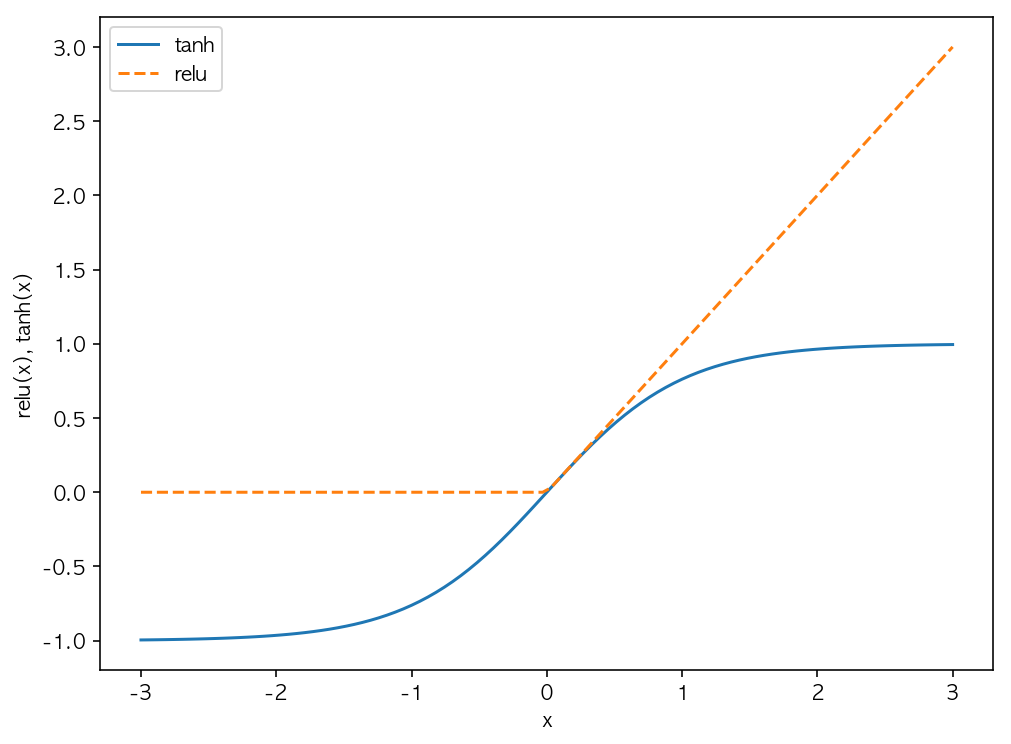

In [85]:
line = np.linspace(-3, 3, 100)
plt.figure(figsize=(8, 6))
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu", linestyle="--")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show()

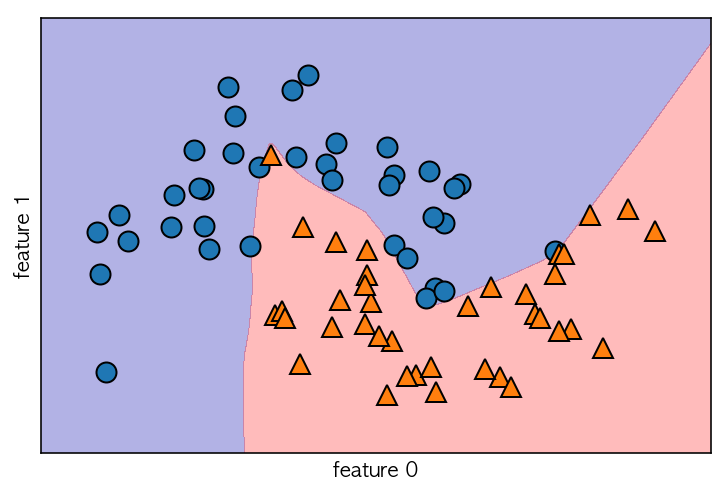

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

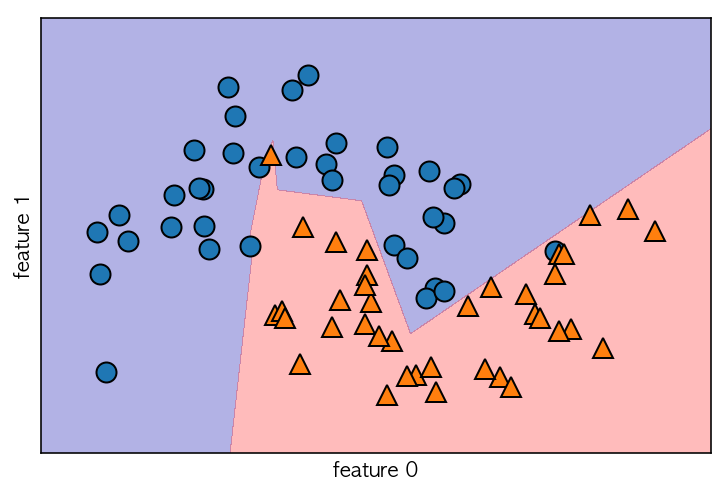

In [87]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

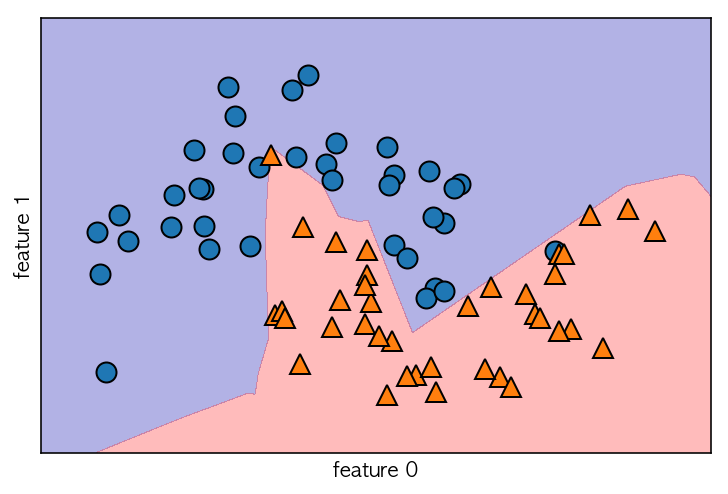

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

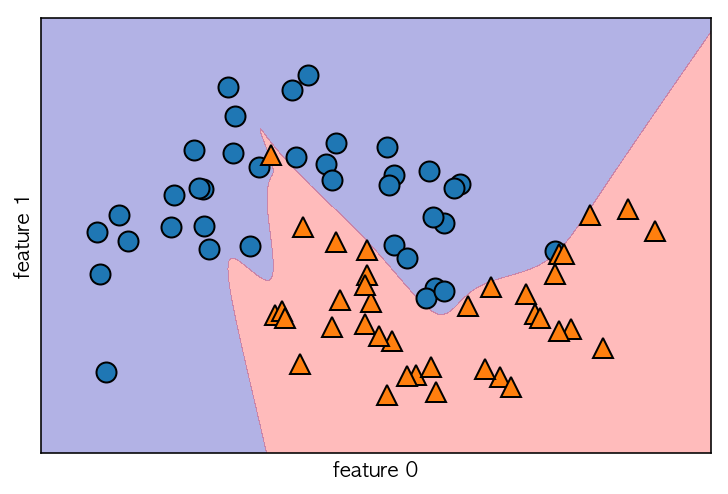

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', activation='tanh', 
                    random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

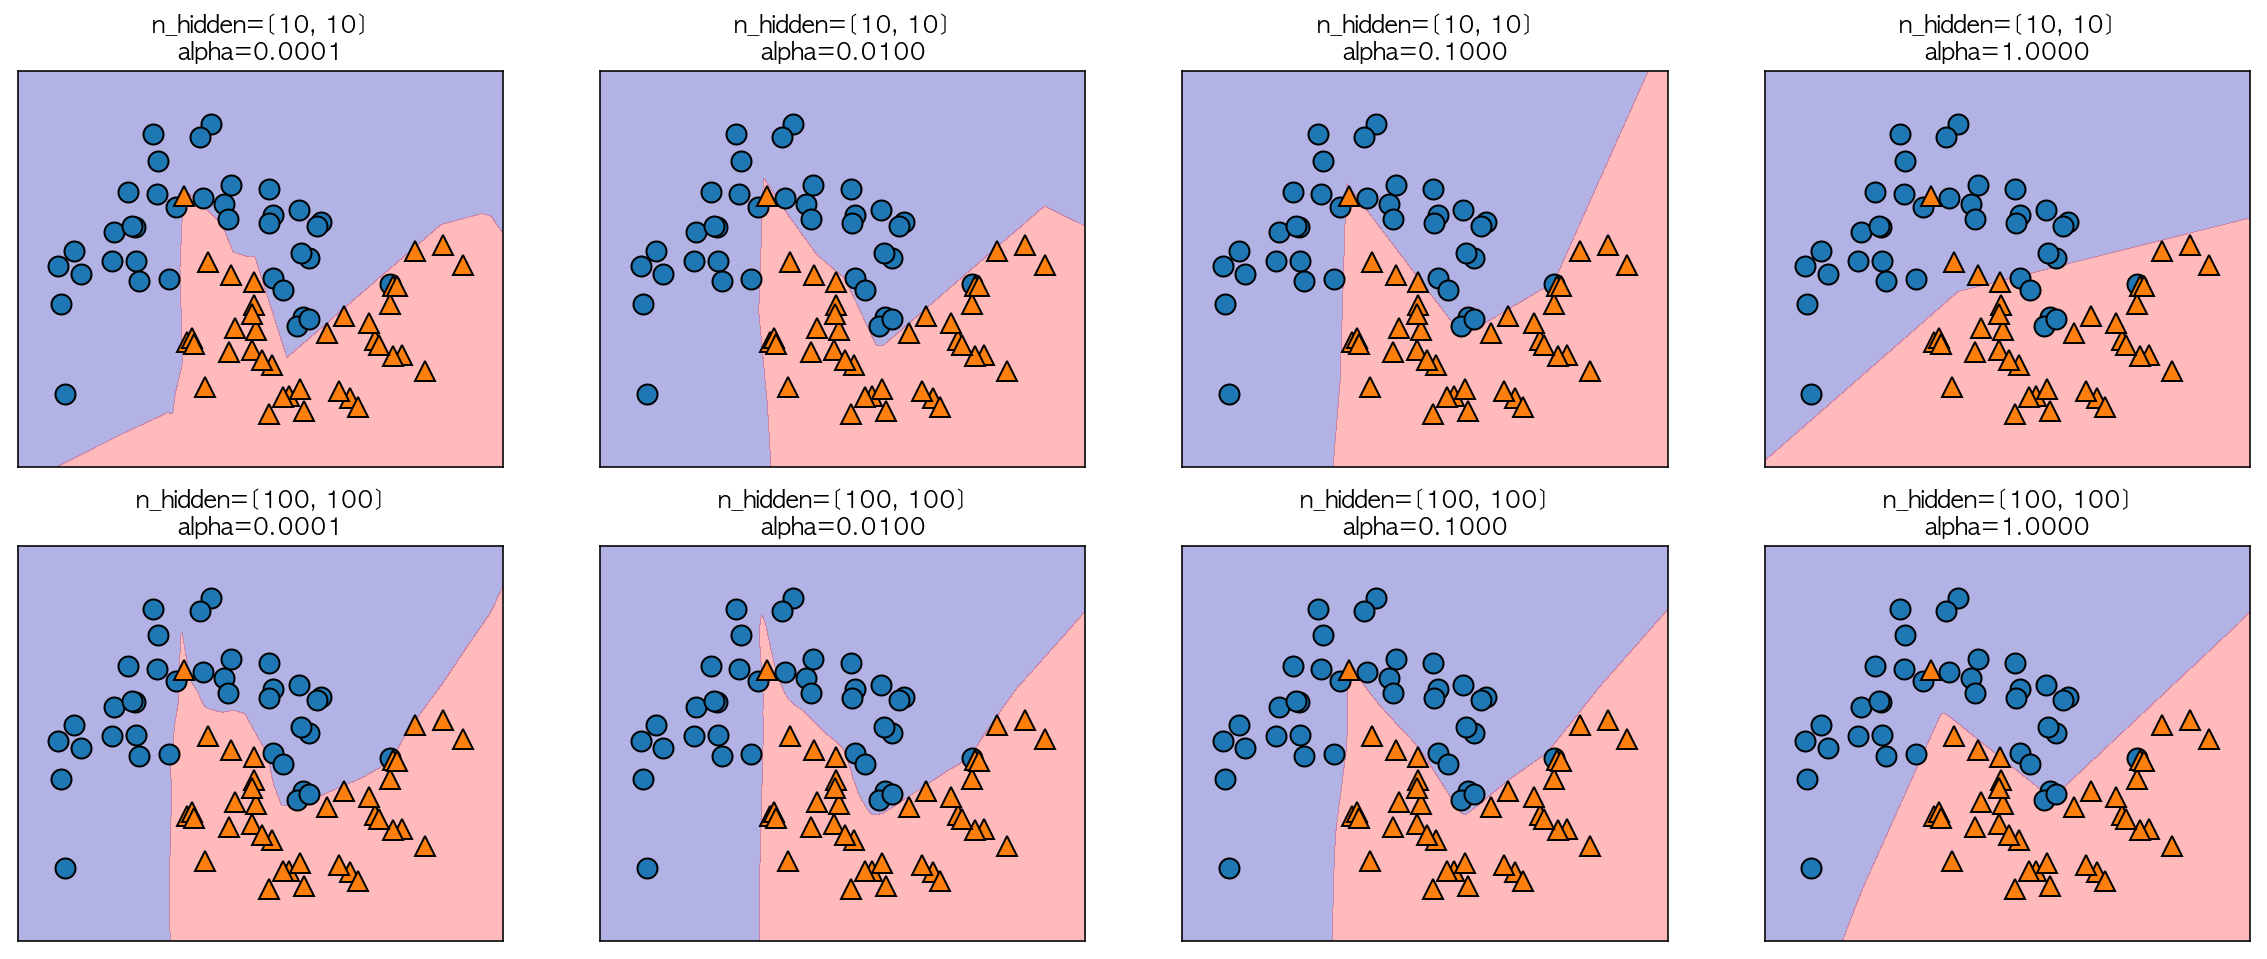

In [90]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

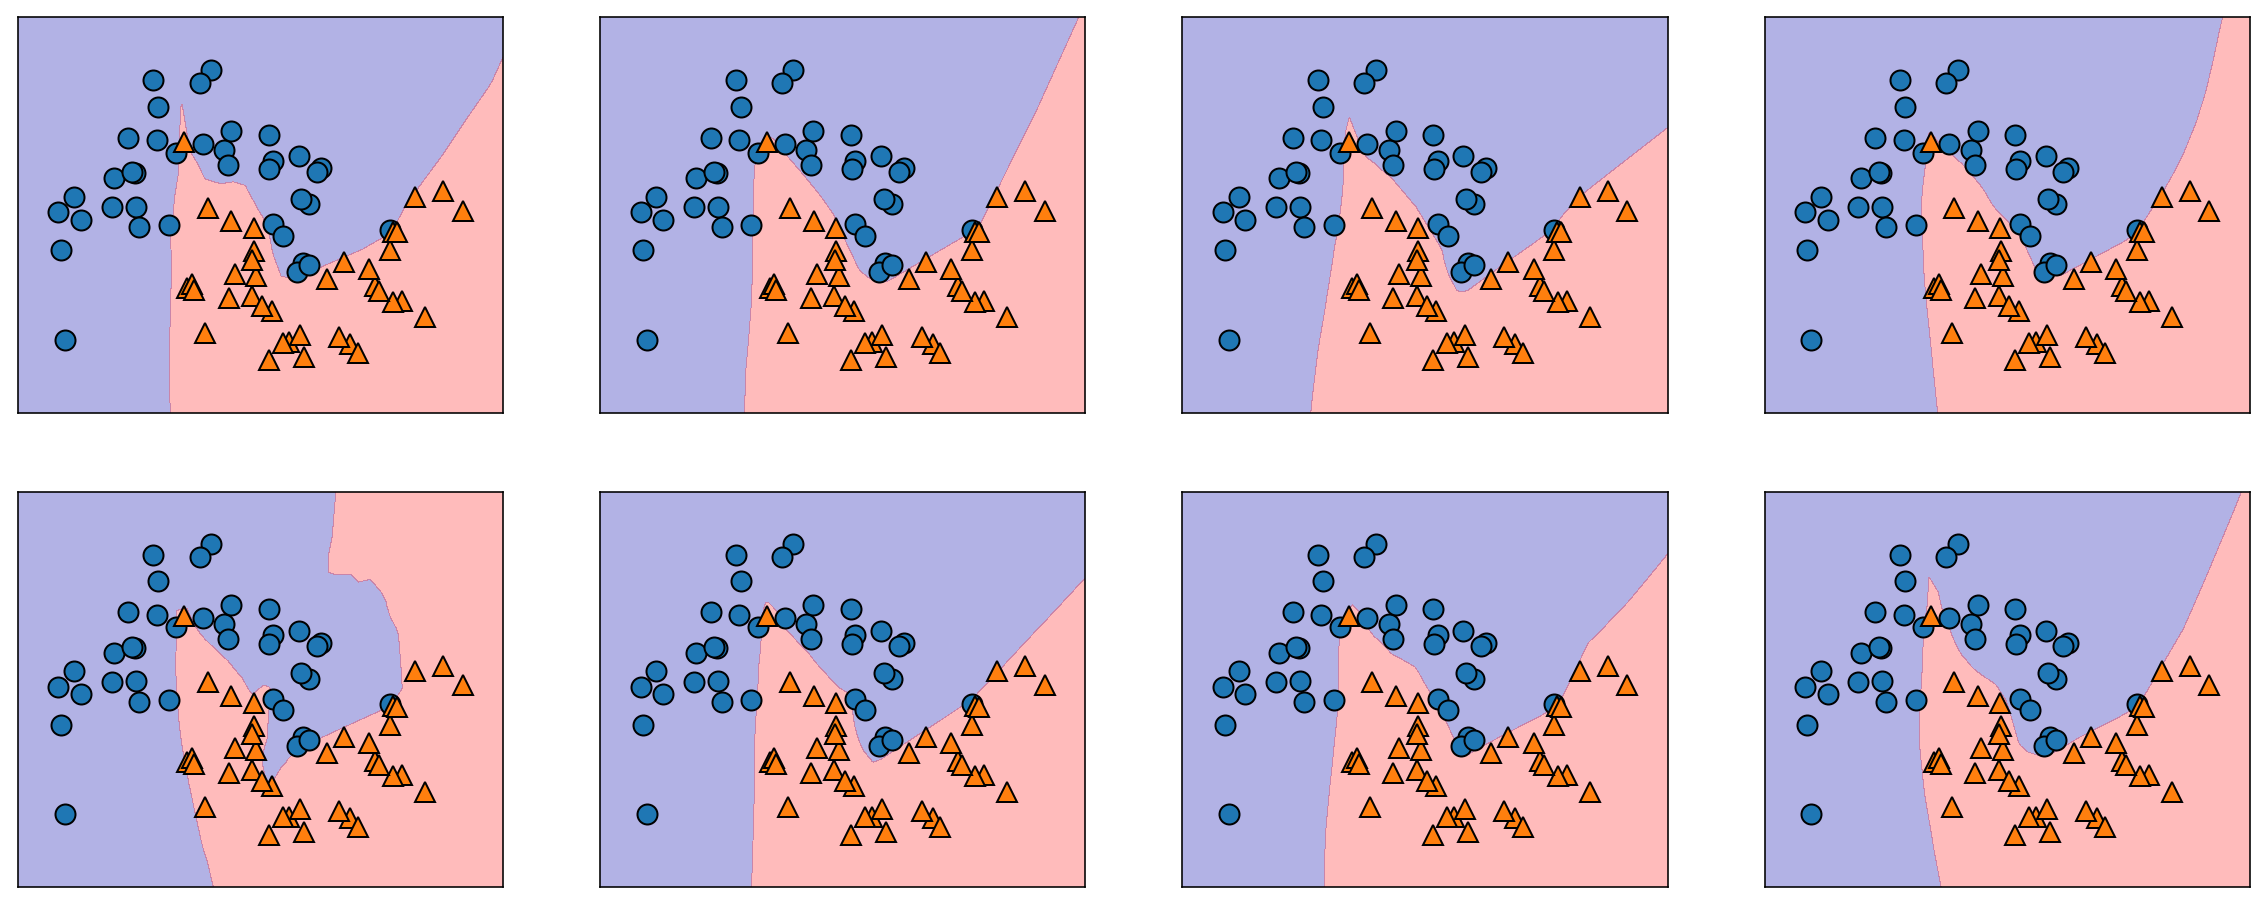

In [93]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, 
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [96]:
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Score of train set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Score of test set: {:.2f}".format(mlp.score(X_test, y_test)))

Score of train set: 0.91
Score of test set: 0.88


In [99]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Score of train set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Score of test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Score of train set: 0.99
Score of test set: 0.97


/Users/sunwoongkim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [100]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Score of train set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Score of test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Score of train set: 0.993
Score of test set: 0.972


In [101]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Score of train set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Score of test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Score of train set: 0.988
Score of test set: 0.972


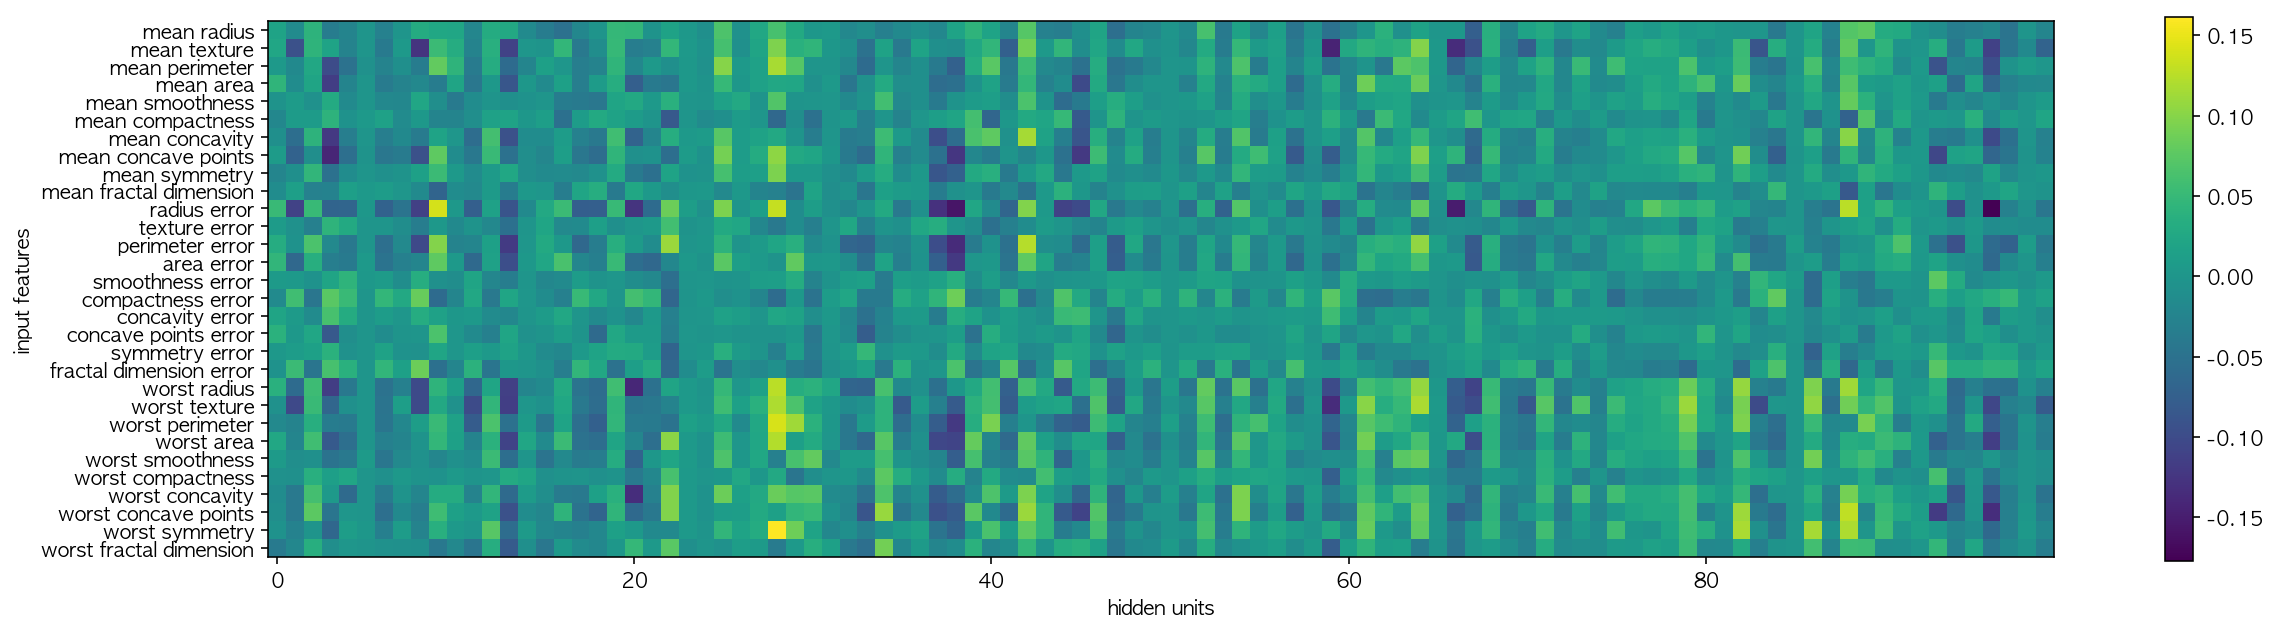

In [103]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden units")
plt.ylabel("input features")
plt.colorbar()
plt.show()

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
    X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [106]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [107]:
print("결정 함수: {}".format(gbrt.decision_function(X_test)[:6]))

결정 함수: [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [108]:
print("임계치와 결정 함수 결과 비교: {}".format(gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교: [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [110]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is same as prediction: {}".format(
    np.all(pred==gbrt.predict(X_test))))

pred is same as prediction: True


In [111]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


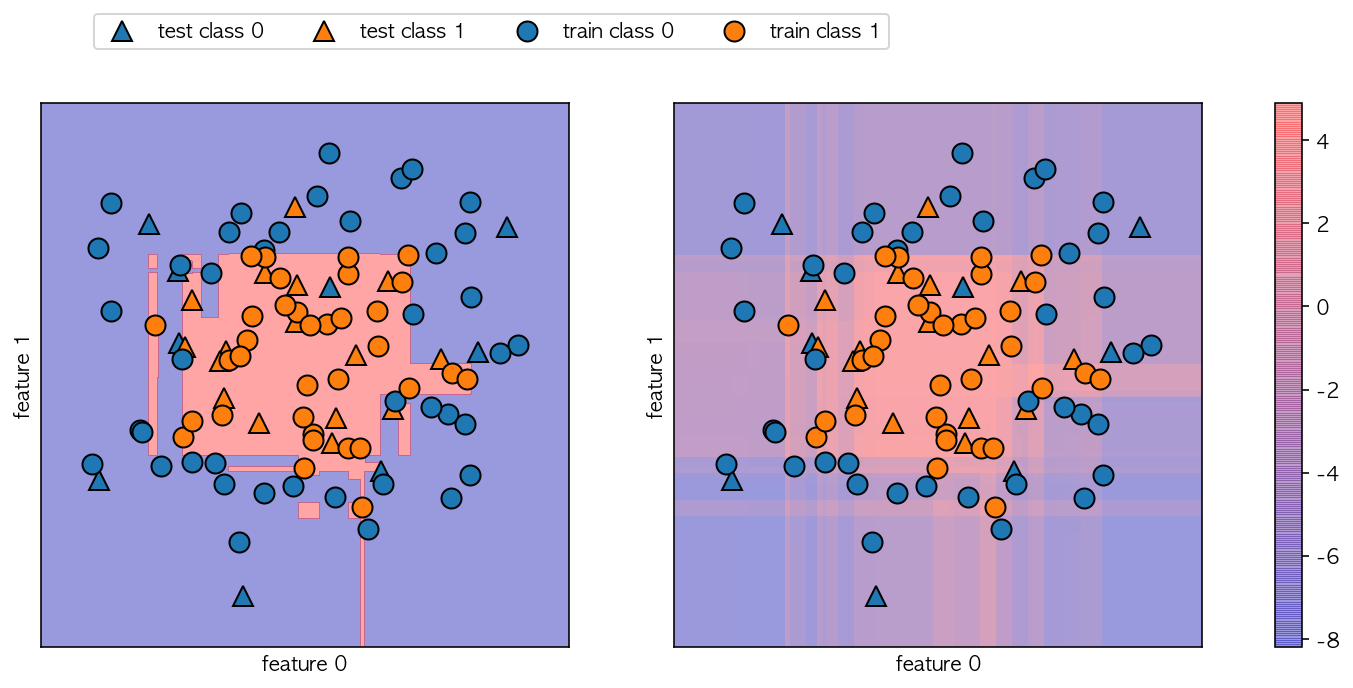

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.plots.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, 
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], 
                                            alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, 
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, 
                             markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], 
               ncol=4, loc=(.1, 1.1))

In [113]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [114]:
print("prediction probability:\n{}".format(gbrt.predict_proba(X_test)[:6]))

prediction probability:
[[ 0.01573626  0.98426374]
 [ 0.84575649  0.15424351]
 [ 0.98112869  0.01887131]
 [ 0.97406775  0.02593225]
 [ 0.01352142  0.98647858]
 [ 0.02504637  0.97495363]]


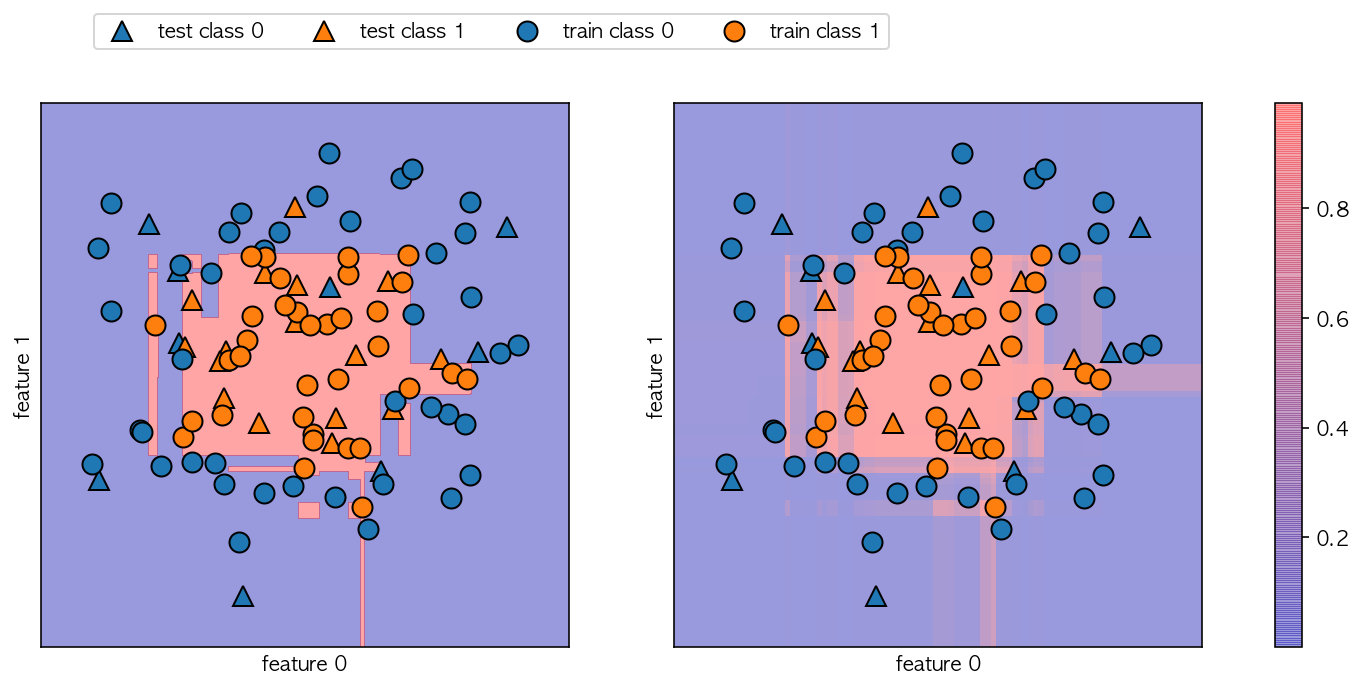

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.plots.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, 
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], 
                                            alpha=.4, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, 
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, 
                             markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "train class 0", "train class 1"], 
               ncol=4, loc=(.1, 1.1))

In [122]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [123]:
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [126]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("prediction:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
prediction:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [125]:
print("prediction probability:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("sum: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

prediction probability:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
sum: [ 1.  1.  1.  1.  1.  1.]


In [127]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("prediction:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
prediction:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [128]:
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("prediction: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:\n{}".format(argmax_dec_func[:10]))
print("인덱스를 classes_에 연결: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
prediction: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
